# __Dissertation__
## __Automated Diagnosis of COVID-19 using Medical Imagery__

_Alister George Luiz (agl2)_

_H00310537_

_Year IV_

_Heriot-Watt University_

__Please do ensure that you download these Train and Test files and save them on Google Drive under the folder named 'DissertationDataset', before running this Notebook.__

_Also please change the runtime to TPU, under Runtime -> Change Runtime Type, for optimal performance!_

Thanks,

Alister Luiz

The links can be found below:

https://drive.google.com/file/d/1--FTt4APnQxskAkCTVN8PvgLetw00ZN6/view?usp=sharing, 

https://drive.google.com/file/d/1-4V5qfcjN-BhwNVckwjl1ck4YbFQ7g8b/view?usp=sharing, 

https://drive.google.com/file/d/1-6vOer4RiEPBj67h7hC0HpMyrdFOJqzX/view?usp=sharing, 

https://drive.google.com/file/d/1-A71rbff31l24Cg3ymIgDWi8eUV_e49n/view?usp=sharing, 

https://drive.google.com/file/d/1i5c2EtehGo1xlDH7N77DBLUffpxRbn0U/view?usp=sharing, 

https://drive.google.com/file/d/1i6HWNS6zPe5W0dlW93IYKm0nnoswEcCi/view?usp=sharing,

https://drive.google.com/file/d/1i9Bw4M8pH0ilV7JdOS2fuF45tj_AOuyT/view?usp=sharing, 

https://drive.google.com/file/d/1iBCRt24z354-PKrfk-vvz-Xs35iwDjKS/view?usp=sharing

### __Mount Google Drive__

In [ ]:
# Importing Google Drive Folders
from google.colab import drive

In [ ]:
'drive.mount('/content/drive')

Mounted at /content/drive


### __Importing Essential Libraries__

In [ ]:
# Install necessary libraries (Uncomment to download)

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install cv2
!pip install PIL
!pip install sklearn
!pip install skimage
!pip install scipy
!pip install tensorflow
!pip install keras-unet
!pip install seaborn
!pip install keras-unet-collection
!pip install torchviz
!pip install imageio

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.
     |████████████████████████████████| 61kB 3.7MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.2-cp37-none-any.whl size=4152 sha256=9882108947fcba446c8183d7034264d55b12c4758d26125e651c6712ac272e4d
  Stored in directory: /root/.cache/pip/wheels/01/26/58/026ffd533dbe8b3972eb423da9c7949beca68d1c98ed9e8624
Successfully built torchviz


In [ ]:
# Importing Required Python Libraries
import os
from collections import Counter
import pickle
import glob
import h5py
import shutil
import random
import json

# Importing Required Python Libraries
import numpy as np
import cv2    
import pandas as pd  
from PIL import Image
import imageio

# Importing Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cms
import matplotlib.image as mpimg
import seaborn as sns

# Importing Scikit-Learn's Libraries
from sklearn.utils import class_weight, shuffle
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, plot_confusion_matrix, multilabel_confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from skimage import measure, morphology
from skimage.transform import resize
from sklearn.cluster import KMeans

# Importing Tensorflow and Keras Libraries
import tensorflow as tf 
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint, Callback
from tensorflow.keras.models import load_model 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Softmax, Activation, Dense, Dropout
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# CT Scan Segmentation Imports
from keras_unet.models import vanilla_unet
from keras_unet_collection import models as kerasModels

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


### __Colab Performance Essentials__

In [ ]:
# Imports to check GPU configuration
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

# Other essential imports
import glob
import numpy as np
import h5py
import cv2

  Created wheel for gputil: filename=GPUtil-1.4.0-cp37-none-any.whl size=7411 sha256=3ab08f3cfcdb03c2ab926d25332c05cfd369e2f41d4b8874717eee5222a14460
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil


In [ ]:
# TPU Setup Code
use_tpu = True #@param {type:"boolean"}

if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''
  
# Model specific parameters

# TPU address
tpu_address = TF_MASTER

# Number of epochs
epochs = 50

# Number of steps_per_epoch
steps_per_epoch = 5

# NOTE: Total number of training steps = Number of epochs * Number of steps_per_epochs

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TF_MASTER)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.8.250.210:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.8.250.210:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
# If GPU shared run the code to kill other processes
# !kill -9 -1

### __Utility Functions__

In [ ]:
def display_training_curves(training, validation, title):
    """
    Display's trends in training parameters such 
    as Loss and Accuracy.
    """
    plt.plot(training)
    plt.plot(validation)
    plt.title('Model ' + title.capitalize())
    plt.ylabel(title.capitalize())
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    """
    Defines the Grad-CAM saliency map technique.
    Identifies the pixels which contribute the most to the classification.
    Code excerpt taken from:
    https://keras.io/examples/vision/grad_cam/
    """
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    # Returns the heatmap and the index of the most probable class
    return heatmap, top_pred_index.numpy()

In [ ]:
def superimposed_img(image, heatmap, imageSize):
    """
    Superimposes the Grad-CAM heatmap with the original 
    image.
    Code excerpt taken from:
    https://keras.io/examples/vision/grad_cam/
    """
    # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
    jet = cms.get_cmap("jet")

    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # We create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((imageSize, imageSize))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.4 + image
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    return superimposed_img

In [ ]:
def displayScans(imgDir, noToDisplay, scanName, scanType):
  """
  Function to display subplots of scans 
  belonging to certain class
  """
  plt.figure(figsize=(10,10))
  for i in range(noToDisplay):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(imgDir + "/" + scanName, scanType[i])),cmap='gray')
    plt.title(scanName)
  plt.show()

In [ ]:
def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        
    if title:
        plt.title(title)

### __Callback Set Up__

In [ ]:
# Set up learning rate reduction and early stopping
lrReduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.0001, patience=8, verbose=1)
esCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=1)

## __X-Ray Scans__

#### __Loading Data__

In [ ]:
# !unzip 'drive/MyDrive/DissertationDataset/Data.zip' -d 'drive/MyDrive/DissertationDataset/'

Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(345).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(346).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(347).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(348).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(349).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(35).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(350).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(351).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(352).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(353).jpg  
  inflating: drive/MyDrive/DissertationDataset/Data/train/NORMAL/NORMAL(354).jpg  
  inflating: drive/MyDrive/Dissertati

In [ ]:
# Move 11% (approx. 52) of X-Ray Scans from each class to test folder (11th Fold)
# fromDir = "drive/MyDrive/DissertationDataset/Data/train" 
# toDir = "drive/MyDrive/DissertationDataset/Data/test"

# classesDir = ["COVID19", "NORMAL", "PNEUMONIA"]

# for i in classesDir:
#   files = [f for f in os.listdir(os.path.join(fromDir, i))]
#   randomSample = random.sample(files, 52)
#   for j in randomSample:
#     shutil.move(os.path.join(os.path.join(fromDir, i), j), os.path.join(toDir, i))

In [ ]:
# Keep only 520 images from each of the 3 classes
# !find 'drive/MyDrive/DissertationDataset/Data/train/COVID19' -type f -print0 | sort -zR | tail -zn +521 | xargs -0 rm
# !find 'drive/MyDrive/DissertationDataset/Data/train/NORMAL' -type f -print0 | sort -zR | tail -zn +521 | xargs -0 rm
# !find 'drive/MyDrive/DissertationDataset/Data/train/PNEUMONIA' -type f -print0 | sort -zR | tail -zn +521 | xargs -0 rm

In [ ]:
# dataPathTrain = 'drive/MyDrive/DissertationDataset/Data/train/*/*.jpg'
# dataPathTest = 'drive/MyDrive/DissertationDataset/Data/test/*/*.jpg'
# # Get all the image paths 
# addrsTrain = glob.glob(dataPathTrain)
# addrsTest = glob.glob(dataPathTest)

In [ ]:
def getData(paths):
  """
    Function iterates through all the images present in the folder path and 
    generates two numpy arrays, one for the image and another for their 
    respective labels for model training purposes.
  """
  X = []
  Y = []
  for i, j in enumerate(paths):
    img=cv2.imread(j, cv2.IMREAD_COLOR) 
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(224, 224), interpolation=cv2.INTER_AREA)
    X.append(img)
    if ('NORMAL' in j):
      Y.append('NORMAL')
    elif ('COVID19' in j):
      Y.append('COVID19')
    else:
      Y.append('PNEUMONIA')
    print('Processed: ' + str(i + 1) + '/' + str(len(paths)))
  return np.array(X), np.array(Y)

In [ ]:
# XTrain, YTrain = getData(addrsTrain)

Processed: 1/1560
Processed: 2/1560
Processed: 3/1560
Processed: 4/1560
Processed: 5/1560
Processed: 6/1560
Processed: 7/1560
Processed: 8/1560
Processed: 9/1560
Processed: 10/1560
Processed: 11/1560
Processed: 12/1560
Processed: 13/1560
Processed: 14/1560
Processed: 15/1560
Processed: 16/1560
Processed: 17/1560
Processed: 18/1560
Processed: 19/1560
Processed: 20/1560
Processed: 21/1560
Processed: 22/1560
Processed: 23/1560
Processed: 24/1560
Processed: 25/1560
Processed: 26/1560
Processed: 27/1560
Processed: 28/1560
Processed: 29/1560
Processed: 30/1560
Processed: 31/1560
Processed: 32/1560
Processed: 33/1560
Processed: 34/1560
Processed: 35/1560
Processed: 36/1560
Processed: 37/1560
Processed: 38/1560
Processed: 39/1560
Processed: 40/1560
Processed: 41/1560
Processed: 42/1560
Processed: 43/1560
Processed: 44/1560
Processed: 45/1560
Processed: 46/1560
Processed: 47/1560
Processed: 48/1560
Processed: 49/1560
Processed: 50/1560
Processed: 51/1560
Processed: 52/1560
Processed: 53/1560
Pr

In [ ]:
# XTrain.shape, YTrain.shape

((1560, 224, 224, 3), (1560,))

In [ ]:
# XTest, YTest = getData(addrsTest)

Processed: 1/156
Processed: 2/156
Processed: 3/156
Processed: 4/156
Processed: 5/156
Processed: 6/156
Processed: 7/156
Processed: 8/156
Processed: 9/156
Processed: 10/156
Processed: 11/156
Processed: 12/156
Processed: 13/156
Processed: 14/156
Processed: 15/156
Processed: 16/156
Processed: 17/156
Processed: 18/156
Processed: 19/156
Processed: 20/156
Processed: 21/156
Processed: 22/156
Processed: 23/156
Processed: 24/156
Processed: 25/156
Processed: 26/156
Processed: 27/156
Processed: 28/156
Processed: 29/156
Processed: 30/156
Processed: 31/156
Processed: 32/156
Processed: 33/156
Processed: 34/156
Processed: 35/156
Processed: 36/156
Processed: 37/156
Processed: 38/156
Processed: 39/156
Processed: 40/156
Processed: 41/156
Processed: 42/156
Processed: 43/156
Processed: 44/156
Processed: 45/156
Processed: 46/156
Processed: 47/156
Processed: 48/156
Processed: 49/156
Processed: 50/156
Processed: 51/156
Processed: 52/156
Processed: 53/156
Processed: 54/156
Processed: 55/156
Processed: 56/156
P

In [ ]:
# XTest.shape, YTest.shape

((156, 224, 224, 3), (156,))

In [ ]:
# XTrain, YTrain = shuffle(XTrain, YTrain, random_state=0)
# XTest, YTest = shuffle(XTest, YTest, random_state=0)

In [ ]:
# Find total length
# len(XTrain), len(XTest), len(YTrain), len(YTest) 

(1560, 156, 1560, 156)

In [ ]:
# Find length per class
# len(YTrain[YTrain == 'COVID19']), len(YTrain[YTrain == 'NORMAL']),len(YTrain[YTrain == 'PNEUMONIA'])

(520, 520, 520)

In [ ]:
# Find length per class
# len(YTest[YTest == 'COVID19']), len(YTest[YTest == 'NORMAL']),len(YTest[YTest == 'PNEUMONIA'])

(52, 52, 52)

In [ ]:
# Save arrays for faster loading
# with open('drive/MyDrive/DissertationDataset/XTrain.npy', 'wb') as f:
#     np.save(f, XTrain)

# with open('drive/MyDrive/DissertationDataset/XTest.npy', 'wb') as f:
#     np.save(f, XTest)

# with open('drive/MyDrive/DissertationDataset/YTrain.npy', 'wb') as f:
#     np.save(f, YTrain)

# with open('drive/MyDrive/DissertationDataset/YTest.npy', 'wb') as f:
#     np.save(f, YTest)

In [ ]:
# Code above commented as Processed Dataset saved as .npy files, saves processing time!
# Load the saved dataset
with open('drive/MyDrive/DissertationDataset/XTrain.npy', 'rb') as f:
  XTrain = np.load(f)

with open('drive/MyDrive/DissertationDataset/XTest.npy', 'rb') as f:
  XTest = np.load(f)

with open('drive/MyDrive/DissertationDataset/YTrain.npy', 'rb') as f:
  YTrain = np.load(f)

with open('drive/MyDrive/DissertationDataset/YTest.npy', 'rb') as f:
  YTest = np.load(f)

In [ ]:
# Setting Image Size
imageSize = 224 

### __Pretrained DenseNet121__

_Utilizes Transfer Learning Technique._

A pretrained DenseNet121 model on the ImageNet dataset is used to compromise for the limited dataset size.



Augmentation Complete!
29089792/29084464 [==============================] - 0s 0us/step
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
16/16 [==============================] - 46s 2s/step - loss: 4.7216 - accuracy: 0.4383 - val_loss: 1.2981 - val_accuracy: 0.7372
Epoch 2/50
16/16 [==============================] - 2s 120ms/step - loss: 0.6296 - accuracy: 0.8241 - val_loss: 0.7873 - val_accuracy: 0.8013
Epoch 3/50
16/16 [==============================] - 2s 118ms/step - loss: 0.3057 - accuracy: 0.9041 - val_loss: 0.4037 - val_accuracy: 0.9038
Epoch 4/50
16/16 [==============================] - 2s 119ms/step - loss: 0.1975 - accuracy: 0.9305 - val_loss: 0.3418 - val_accuracy: 0.8782
Epoch 5/50
16/16 [==============================] - 2s 115ms/step - loss: 0.1776 - accuracy: 0.9381 - val_loss: 0.3046 - val_accuracy: 0.8782
Epoch 6/50
16/16 [==============================] - 2s 115ms/step - loss: 0.1912 - accuracy: 0.9319 - val

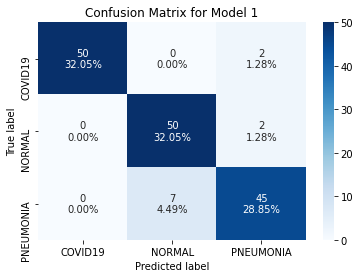

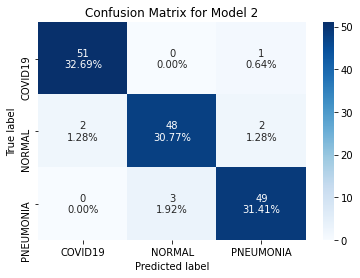

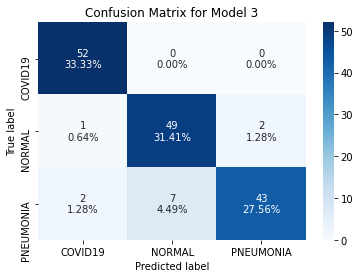

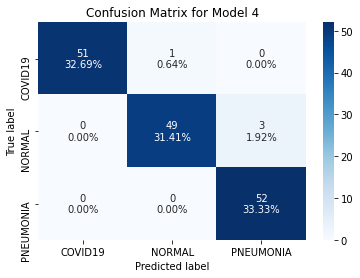

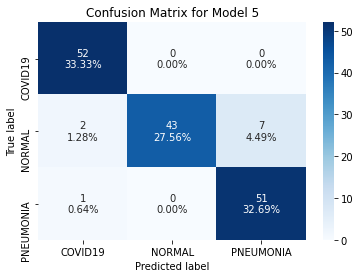

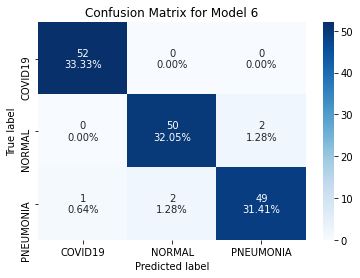

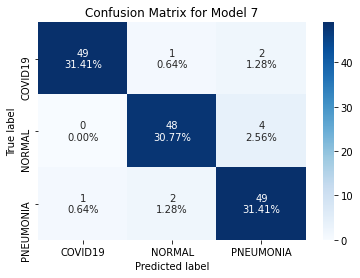

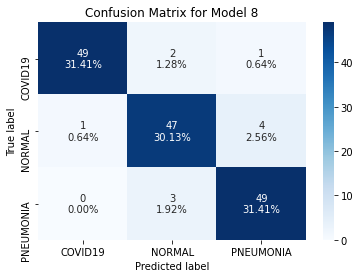

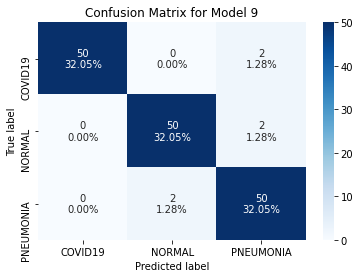

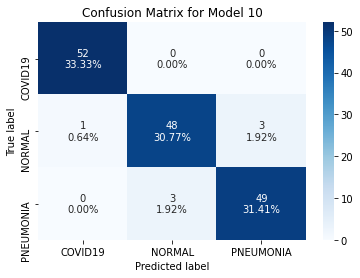

In [ ]:
# Setup StratifiedKFold Cross Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accPerFold = []
lossPerFold = []
# K-fold Cross Validation for Model Training
foldNo = 1
# Initialize Label Encoder to encode Target Labels 
le = LabelEncoder()
for train, test in kfold.split(XTrain, YTrain):
  # Data Augmentation
  covidCount = 0
  pneuCount = 0
  normCount = 0

  augmentedDataX = []
  augmentedDataY = []
  
  numAugmented = 0
  # Augmentation Parameters taken from: https://towardsdatascience.com/data-augmentation-in-medical-images-95c774e6eaae
  trainDatagen = ImageDataGenerator(rotation_range = 5, shear_range = 0.02, zoom_range = 0.02, samplewise_center=True, samplewise_std_normalization= True)
  
  # Use Data Augmentation to generate 600 Images per class
  for XBatch, YBatch in trainDatagen.flow(XTrain[train], YTrain[train], batch_size=1, shuffle=False):
    if (YBatch == 'COVID19'):
      if (covidCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        covidCount += 1
    elif (YBatch == 'PNEUMONIA'):
      if (pneuCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        pneuCount += 1
    else:
      if (normCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        normCount += 1
    numAugmented += 1
    if numAugmented == 1800:
      print("\n\nAugmentation Complete!")
      break

  # Concatenate Augmented Data
  augmentedDataX = np.concatenate(augmentedDataX)
  augmentedDataY = np.concatenate(augmentedDataY)
  augmentedDataX = np.concatenate((augmentedDataX, XTrain[train]), axis=0)
  augmentedDataY = np.concatenate((augmentedDataY, YTrain[train]), axis=0)
  
  # Encode Target Labels
  YCatAug = tf.keras.utils.to_categorical(le.fit_transform(augmentedDataY))
  YCatVal = tf.keras.utils.to_categorical(le.fit_transform(YTrain[test]))

  # Begin Training
  with strategy.scope():
    # Load pre-trained model to apply Transfer Learning
    pretrainedDenseNet = tf.keras.applications.DenseNet121(input_shape = (imageSize, imageSize, 3), weights = 'imagenet', include_top = False)
    x1 = pretrainedDenseNet.output
    x1 = tf.keras.layers.GlobalAveragePooling2D()(x1)
    x1 = tf.keras.layers.Dense(1024, activation='relu')(x1)
    predictions = tf.keras.layers.Dense(3, activation='softmax')(x1) 

    # Set only the last layer to be trainable
    for layer in pretrainedDenseNet.layers[:707]:
      layer.trainable = False
  
    for layer in pretrainedDenseNet.layers[707:]:
      layer.trainable = True 

    # Compile the Model
    modelDenseNet = Model(inputs = pretrainedDenseNet.input, outputs = predictions)
    modelDenseNet.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {foldNo} ...')

  # Fit data to model and save the best model to Google Drive
  mcpSaveDenseNet = ModelCheckpoint('drive/MyDrive/DissertationDataset/Models/DenseNet121/DenseNet' + str(foldNo) + '.h5', save_best_only=True, monitor='val_loss', mode='min')
  historyDenseNet = modelDenseNet.fit(augmentedDataX, YCatAug, validation_data = (XTrain[test], YCatVal), callbacks=[lrReduce, esCallback, mcpSaveDenseNet], epochs=50, batch_size=210)

  # Generate generalization metrics
  scores = modelDenseNet.evaluate(XTrain[test], YCatVal, verbose=0)
  print(f'Score for fold {foldNo}: {modelDenseNet.metrics_names[0]} of {scores[0]}; {modelDenseNet.metrics_names[1]} of {scores[1]*100}%')
  accPerFold.append(scores[1] * 100)
  lossPerFold.append(scores[0])

  # Increase fold number
  foldNo = foldNo + 1

  # Print out Fold Results, Classification Report, and Confusion Matrix
  predict = modelDenseNet.predict(XTrain[test])
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  for j in YCatVal:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(foldNo - 1))

In [ ]:
# Average 10-Fold Cross Validation Accuracy
np.mean(accPerFold)

94.61538553237915

In [ ]:
# Average 10-Fold Cross Validation Loss
np.mean(lossPerFold)

0.17079671919345857

Model 1:

              precision    recall  f1-score   support

     COVID19       1.00      1.00      1.00        52
      NORMAL       0.94      0.92      0.93        52
   PNEUMONIA       0.92      0.94      0.93        52

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156

Model 2:

              precision    recall  f1-score   support

     COVID19       1.00      0.96      0.98        52
      NORMAL       0.94      0.92      0.93        52
   PNEUMONIA       0.89      0.94      0.92        52

    accuracy                           0.94       156
   macro avg       0.94      0.94      0.94       156
weighted avg       0.94      0.94      0.94       156

Model 3:

              precision    recall  f1-score   support

     COVID19       1.00      0.94      0.97        52
      NORMAL       0.91      0.94      0.92        52
   PNEUMONIA       0.91      0.92      0.91  

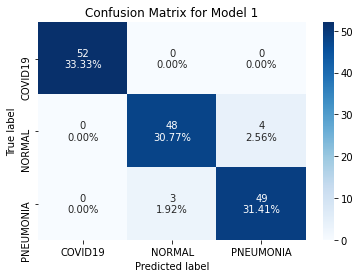

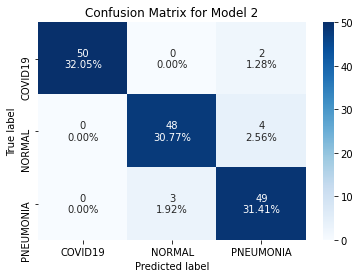

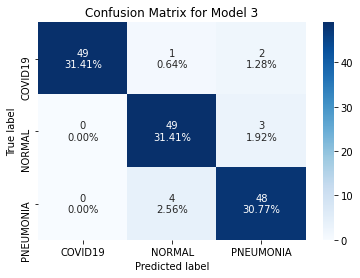

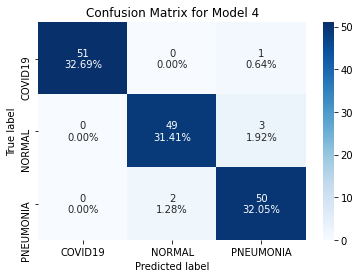

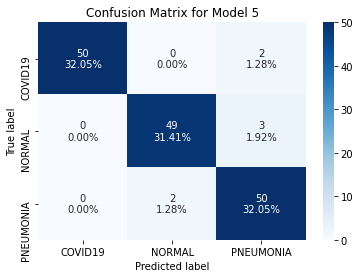

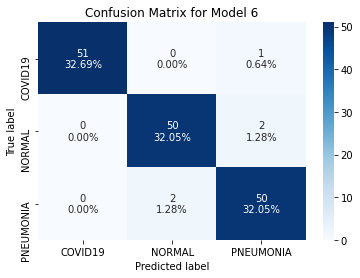

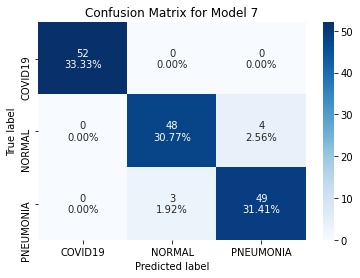

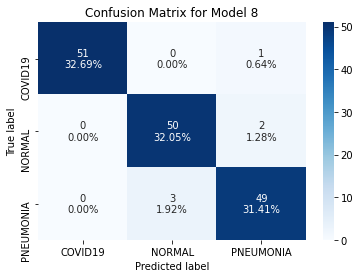

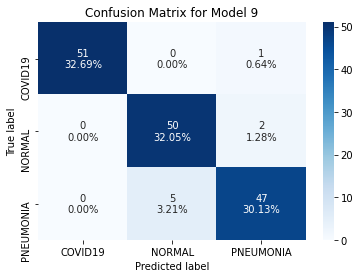

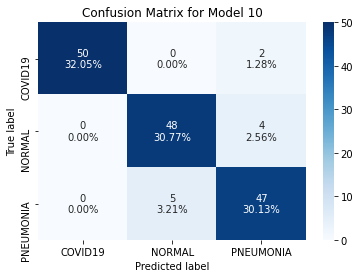

In [ ]:
# Model Evaluation on Unseen Data
for i in range(1, 11):
  reconstructedDenseNet = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/DenseNet121/DenseNet'+str(i)+'.h5')
  predict = reconstructedDenseNet.predict(XTest)
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  print('Model ' + str(i) + ':\n')
  YCatTest = tf.keras.utils.to_categorical(le.fit_transform(YTest))
  for j in YCatTest:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(i))

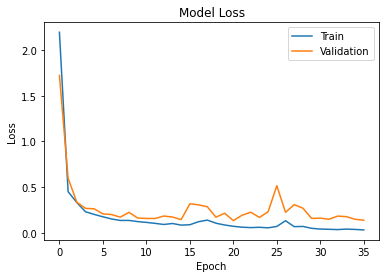

In [ ]:
# Plot Trends in Loss
display_training_curves(historyDenseNet.history['loss'], historyDenseNet.history['val_loss'], 'loss')

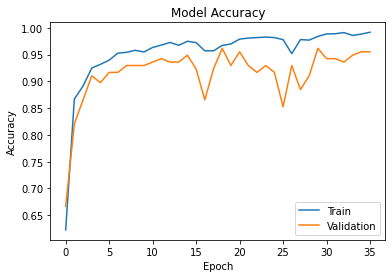

In [ ]:
# Plot Trends in Accuracy
display_training_curves(historyDenseNet.history['accuracy'], historyDenseNet.history['val_accuracy'], 'accuracy')

### __Pretrained ResNet50__

_Utilizes Transfer Learning Technique._

A pretrained ResNet50 model on the ImageNet dataset is used to compromise for the limited dataset size.



Augmentation Complete!
94773248/94765736 [==============================] - 1s 0us/step
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
16/16 [==============================] - 28s 1s/step - loss: 1.8851 - accuracy: 0.5289 - val_loss: 0.7478 - val_accuracy: 0.8526
Epoch 2/50
16/16 [==============================] - 1s 89ms/step - loss: 0.4433 - accuracy: 0.8519 - val_loss: 0.3240 - val_accuracy: 0.9103
Epoch 3/50
16/16 [==============================] - 1s 90ms/step - loss: 0.2976 - accuracy: 0.8998 - val_loss: 0.2888 - val_accuracy: 0.9103
Epoch 4/50
16/16 [==============================] - 1s 87ms/step - loss: 0.2516 - accuracy: 0.9067 - val_loss: 0.2343 - val_accuracy: 0.9295
Epoch 5/50
16/16 [==============================] - 1s 90ms/step - loss: 0.2247 - accuracy: 0.9232 - val_loss: 0.2503 - val_accuracy: 0.9295
Epoch 6/50
16/16 [==============================] - 1s 89ms/step - loss: 0.2045 - accuracy: 0.9224 - val_loss

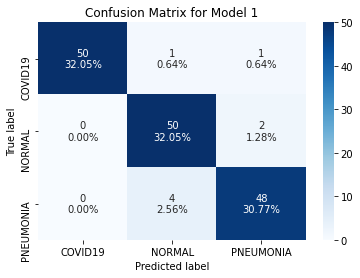

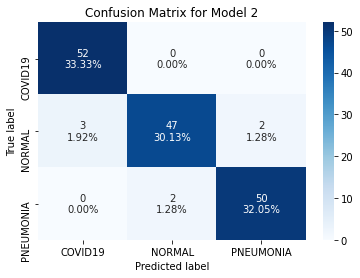

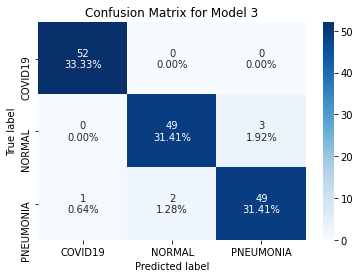

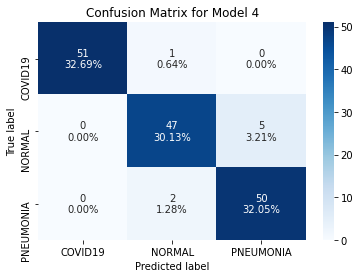

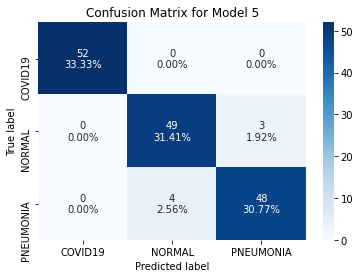

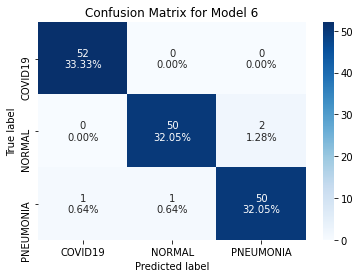

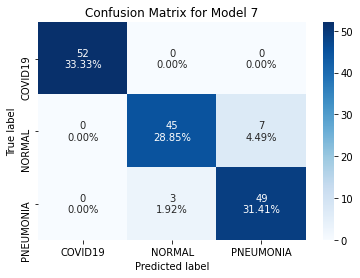

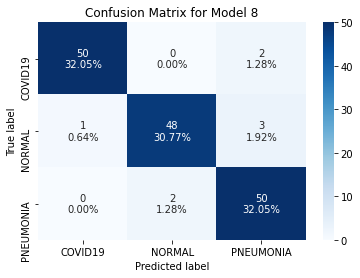

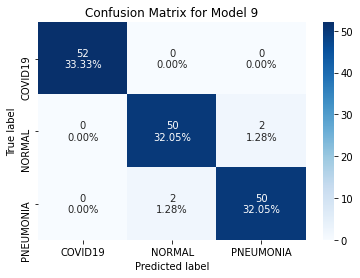

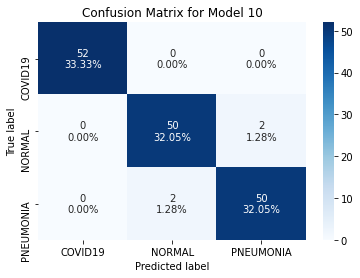

In [ ]:
# Setup StratifiedKFold Cross Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accPerFold = []
lossPerFold = []
# K-fold Cross Validation for Model Training
foldNo = 1
# Initialize Label Encoder to encode Target Labels 
le = LabelEncoder()
for train, test in kfold.split(XTrain, YTrain):
  # Data Augmentation
  covidCount = 0
  pneuCount = 0
  normCount = 0

  augmentedDataX = []
  augmentedDataY = []
  
  numAugmented = 0
  # Augmentation Parameters taken from: https://towardsdatascience.com/data-augmentation-in-medical-images-95c774e6eaae
  trainDatagen = ImageDataGenerator(rotation_range = 5, shear_range = 0.02, zoom_range = 0.02, samplewise_center=True, samplewise_std_normalization= True)

  # Use Data Augmentation to generate 600 Images per class
  for XBatch, YBatch in trainDatagen.flow(XTrain[train], YTrain[train], batch_size=1, shuffle=False):
    if (YBatch == 'COVID19'):
      if (covidCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        covidCount += 1
    elif (YBatch == 'PNEUMONIA'):
      if (pneuCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        pneuCount += 1
    else:
      if (normCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        normCount += 1
    numAugmented += 1
    if numAugmented == 1800:
      print("\n\nAugmentation Complete!")
      break

  # Concatenate Augmented Data
  augmentedDataX = np.concatenate(augmentedDataX)
  augmentedDataY = np.concatenate(augmentedDataY)
  augmentedDataX = np.concatenate((augmentedDataX, XTrain[train]), axis=0)
  augmentedDataY = np.concatenate((augmentedDataY, YTrain[train]), axis=0)
  
  # Encode Target Labels
  YCatAug = tf.keras.utils.to_categorical(le.fit_transform(augmentedDataY))
  YCatVal = tf.keras.utils.to_categorical(le.fit_transform(YTrain[test]))
  
  # Begin Training
  with strategy.scope():
    # Load pre-trained model to apply Transfer Learning
    pretrainedResNet = tf.keras.applications.ResNet50(input_shape = (imageSize, imageSize, 3), weights = 'imagenet', include_top = False)
    x1 = pretrainedResNet.output
    x1 = tf.keras.layers.GlobalAveragePooling2D()(x1)
    x1 = tf.keras.layers.Dense(1024, activation='relu')(x1)
    predictions = tf.keras.layers.Dense(3, activation='softmax')(x1) 

    # Set only the last layer to be trainable
    for layer in pretrainedResNet.layers[:707]:
      layer.trainable = False
  
    for layer in pretrainedResNet.layers[707:]:
      layer.trainable = True 
  
    # Compile the Model
    modelResNet = Model(inputs = pretrainedResNet.input, outputs = predictions)
    modelResNet.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {foldNo} ...')

  # Fit data to model and save the best model to Google Drive
  mcpSaveResNet = ModelCheckpoint('drive/MyDrive/DissertationDataset/Models/ResNet50/ResNet' + str(foldNo) + '.h5', save_best_only=True, monitor='val_loss', mode='min')
  historyResNet = modelResNet.fit(augmentedDataX, YCatAug, validation_data = (XTrain[test], YCatVal), callbacks=[lrReduce, esCallback, mcpSaveResNet], epochs=50, batch_size=210)

  # Generate generalization metrics
  scores = modelResNet.evaluate(XTrain[test], YCatVal, verbose=0)
  print(f'Score for fold {foldNo}: {modelResNet.metrics_names[0]} of {scores[0]}; {modelResNet.metrics_names[1]} of {scores[1]*100}%')
  accPerFold.append(scores[1] * 100)
  lossPerFold.append(scores[0])

  # Increase fold number
  foldNo = foldNo + 1

  # Print out Fold Results, Classification Report, and Confusion Matrix
  predict = modelResNet.predict(XTrain[test])
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  for j in YCatVal:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(foldNo - 1))

In [ ]:
# Average 10-Fold Cross Validation Accuracy
np.mean(accPerFold)

95.76923131942749

In [ ]:
# Average 10-Fold Cross Validation Loss
np.mean(lossPerFold)

0.13310053274035455

Model 1:

              precision    recall  f1-score   support

     COVID19       1.00      1.00      1.00        52
      NORMAL       0.98      0.94      0.96        52
   PNEUMONIA       0.94      0.98      0.96        52

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156

Model 2:

              precision    recall  f1-score   support

     COVID19       1.00      1.00      1.00        52
      NORMAL       0.98      0.96      0.97        52
   PNEUMONIA       0.96      0.98      0.97        52

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156

Model 3:

              precision    recall  f1-score   support

     COVID19       1.00      1.00      1.00        52
      NORMAL       0.98      0.94      0.96        52
   PNEUMONIA       0.94      0.98      0.96  

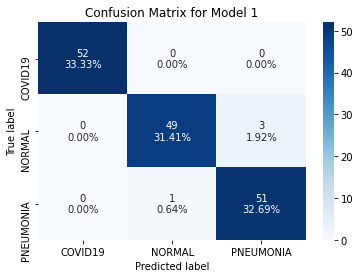

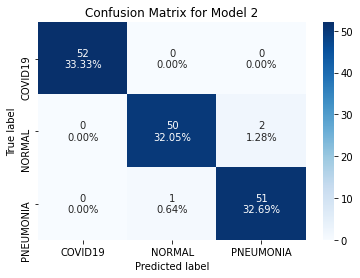

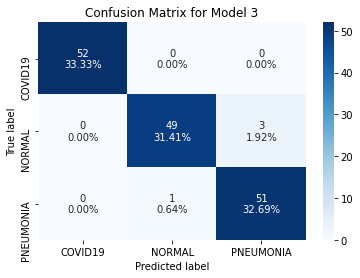

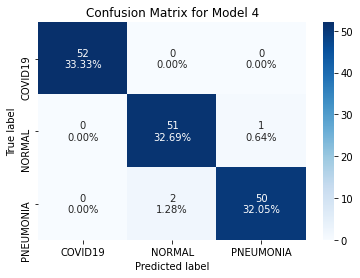

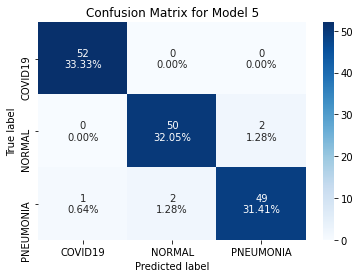

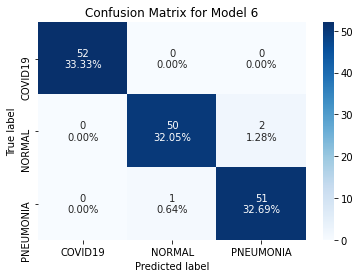

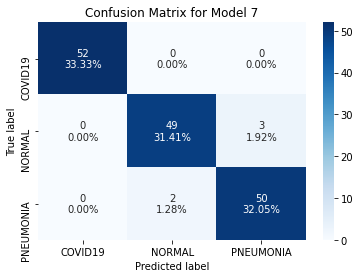

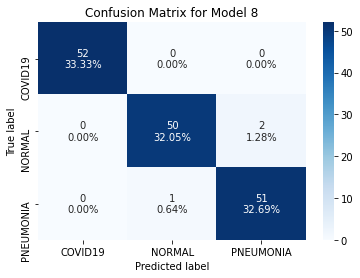

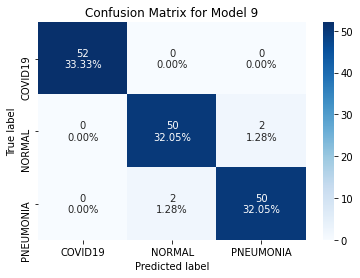

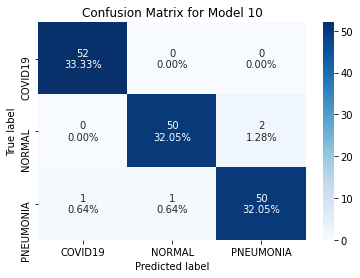

In [ ]:
# Model Evaluation on Unseen Data
for i in range(1, 11):
  reconstructedResNet = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/ResNet50/ResNet'+str(i)+'.h5')
  predict = reconstructedResNet.predict(XTest)
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  print('Model ' + str(i) + ':\n')
  YCatTest = tf.keras.utils.to_categorical(le.fit_transform(YTest))
  for j in YCatTest:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(i))

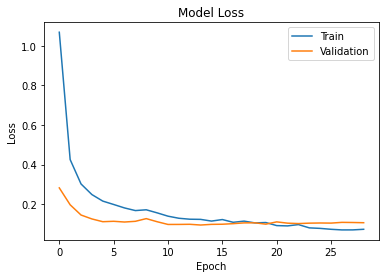

In [ ]:
# Plot Trends in Loss
display_training_curves(historyResNet.history['loss'], historyResNet.history['val_loss'], 'loss')

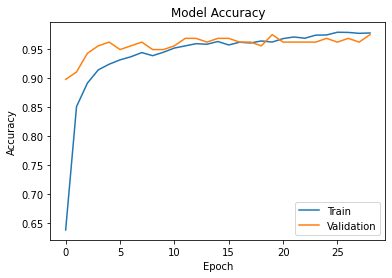

In [ ]:
# Plot Trends in Accuracy
display_training_curves(historyResNet.history['accuracy'], historyResNet.history['val_accuracy'], 'accuracy')

### __Pretrained VGG16__

_Utilizes Transfer Learning Technique._

A pretrained VGG16 model on the ImageNet dataset is used to compromise for the limited dataset size.



Augmentation Complete!
58892288/58889256 [==============================] - 1s 0us/step
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
16/16 [==============================] - 24s 959ms/step - loss: 2.6965 - accuracy: 0.4711 - val_loss: 0.7708 - val_accuracy: 0.8397
Epoch 2/50
16/16 [==============================] - 2s 129ms/step - loss: 0.6373 - accuracy: 0.8221 - val_loss: 0.7062 - val_accuracy: 0.8718
Epoch 3/50
16/16 [==============================] - 2s 127ms/step - loss: 0.5006 - accuracy: 0.8458 - val_loss: 0.4921 - val_accuracy: 0.9167
Epoch 4/50
16/16 [==============================] - 2s 123ms/step - loss: 0.3423 - accuracy: 0.9409 - val_loss: 0.4446 - val_accuracy: 0.9167
Epoch 5/50
16/16 [==============================] - 2s 127ms/step - loss: 0.2763 - accuracy: 0.9446 - val_loss: 0.3669 - val_accuracy: 0.9231
Epoch 6/50
16/16 [==============================] - 2s 126ms/step - loss: 0.2264 - accuracy: 0.9544 - 

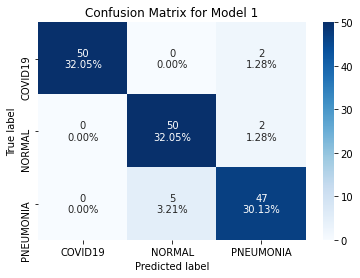

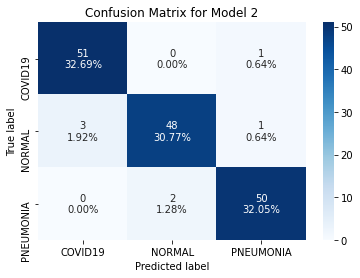

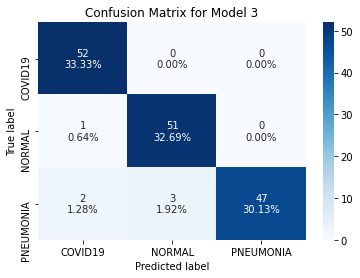

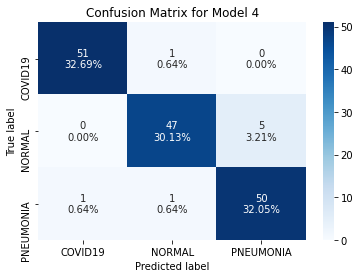

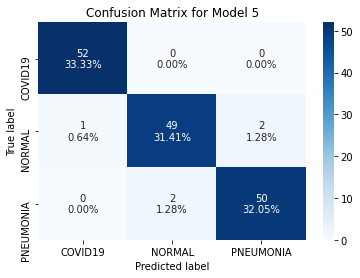

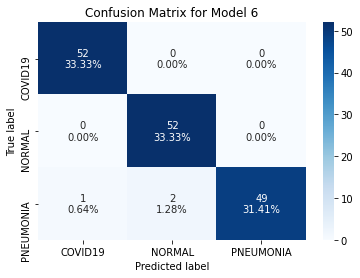

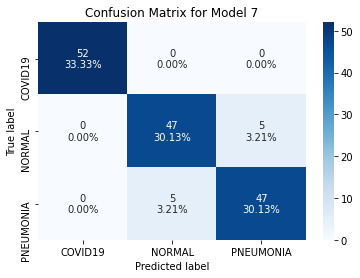

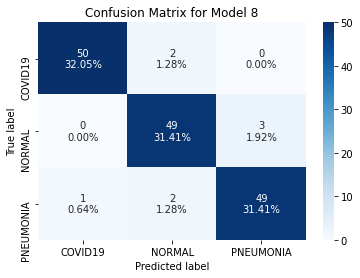

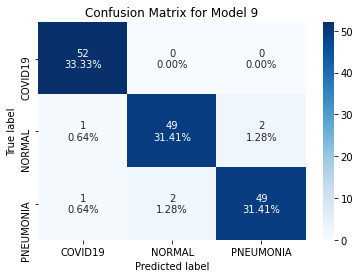

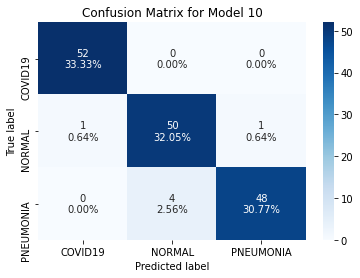

In [ ]:
# Setup StratifiedKFold Cross Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accPerFold = []
lossPerFold = []
# K-fold Cross Validation for Model Training
foldNo = 1
# Initialize Label Encoder to encode Target Labels 
le = LabelEncoder()
for train, test in kfold.split(XTrain, YTrain):
  # Data Augmentation
  covidCount = 0
  pneuCount = 0
  normCount = 0

  augmentedDataX = []
  augmentedDataY = []
  
  numAugmented = 0
  # Augmentation Parameters taken from: https://towardsdatascience.com/data-augmentation-in-medical-images-95c774e6eaae
  trainDatagen = ImageDataGenerator(rotation_range = 5, shear_range = 0.02, zoom_range = 0.02, samplewise_center=True, samplewise_std_normalization= True)
  
  # Use Data Augmentation to generate 600 Images per class
  for XBatch, YBatch in trainDatagen.flow(XTrain[train], YTrain[train], batch_size=1, shuffle=False):
    if (YBatch == 'COVID19'):
      if (covidCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        covidCount += 1
    elif (YBatch == 'PNEUMONIA'):
      if (pneuCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        pneuCount += 1
    else:
      if (normCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        normCount += 1
    numAugmented += 1
    if numAugmented == 1800:
      print("\n\nAugmentation Complete!")
      break

  # Concatenate Augmented Data
  augmentedDataX = np.concatenate(augmentedDataX)
  augmentedDataY = np.concatenate(augmentedDataY)
  augmentedDataX = np.concatenate((augmentedDataX, XTrain[train]), axis=0)
  augmentedDataY = np.concatenate((augmentedDataY, YTrain[train]), axis=0)
  
  # Encode Target Labels
  YCatAug = tf.keras.utils.to_categorical(le.fit_transform(augmentedDataY))
  YCatVal = tf.keras.utils.to_categorical(le.fit_transform(YTrain[test]))
  
  # Begin Training
  with strategy.scope():
    # Load pre-trained model to apply Transfer Learning
    pretrainedVGG = tf.keras.applications.VGG16(input_shape = (imageSize, imageSize, 3), weights = 'imagenet', include_top = False)
    x1 = pretrainedVGG.output
    x1 = tf.keras.layers.GlobalAveragePooling2D()(x1)
    x1 = tf.keras.layers.Dense(1024, activation='relu')(x1)
    predictions = tf.keras.layers.Dense(3, activation='softmax')(x1) 

    # Set only the last layer to be trainable
    for layer in pretrainedVGG.layers[:707]:
      layer.trainable = False
  
    for layer in pretrainedVGG.layers[707:]:
      layer.trainable = True 
  
    # Compile the Model
    modelVGG = Model(inputs = pretrainedVGG.input, outputs = predictions)
    modelVGG.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {foldNo} ...')

  # Fit data to model and save the best model to Google Drive
  mcpSaveVGG = ModelCheckpoint('drive/MyDrive/DissertationDataset/Models/VGG16/VGG' + str(foldNo) + '.h5', save_best_only=True, monitor='val_loss', mode='min')
  historyVGG = modelVGG.fit(augmentedDataX, YCatAug, validation_data = (XTrain[test], YCatVal), callbacks=[lrReduce, esCallback, mcpSaveVGG], epochs=50, batch_size=210)

  # Generate generalization metrics
  scores = modelVGG.evaluate(XTrain[test], YCatVal, verbose=0)
  print(f'Score for fold {foldNo}: {modelVGG.metrics_names[0]} of {scores[0]}; {modelVGG.metrics_names[1]} of {scores[1]*100}%')
  accPerFold.append(scores[1] * 100)
  lossPerFold.append(scores[0])

  # Increase fold number
  foldNo = foldNo + 1

  # Print out Fold Results, Classification Report, and Confusion Matrix
  predict = modelVGG.predict(XTrain[test])
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  for j in YCatVal:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(foldNo - 1))

In [ ]:
# Average 10-Fold Cross Validation Accuracy
np.mean(accPerFold)

95.64102709293365

In [ ]:
# Average 10-Fold Cross Validation Loss
np.mean(lossPerFold)

0.21033191606402396

Model 1:

              precision    recall  f1-score   support

     COVID19       1.00      1.00      1.00        52
      NORMAL       0.96      0.94      0.95        52
   PNEUMONIA       0.94      0.96      0.95        52

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156

Model 2:

              precision    recall  f1-score   support

     COVID19       1.00      1.00      1.00        52
      NORMAL       0.93      0.96      0.94        52
   PNEUMONIA       0.96      0.92      0.94        52

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156

Model 3:

              precision    recall  f1-score   support

     COVID19       1.00      1.00      1.00        52
      NORMAL       0.92      0.92      0.92        52
   PNEUMONIA       0.92      0.92      0.92  

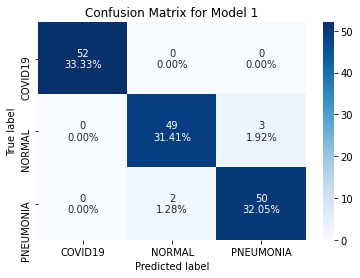

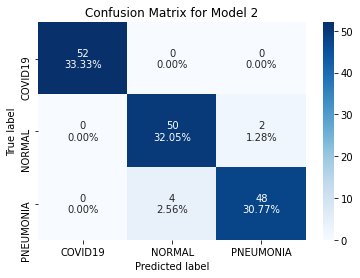

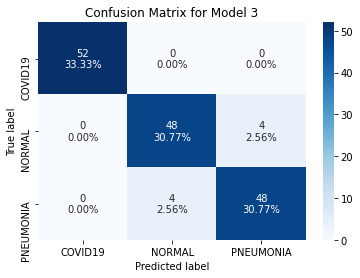

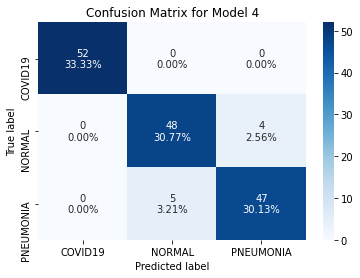

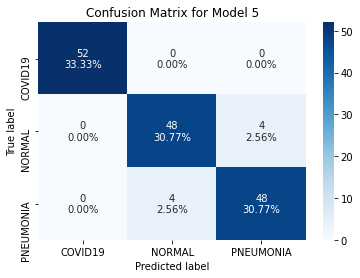

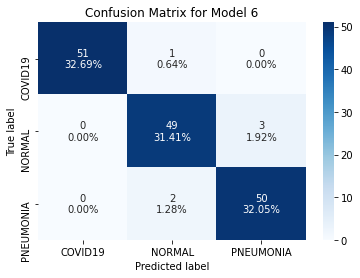

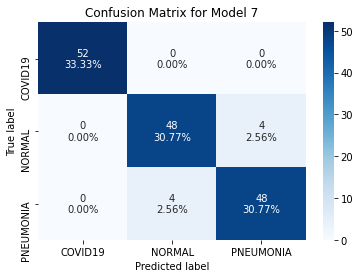

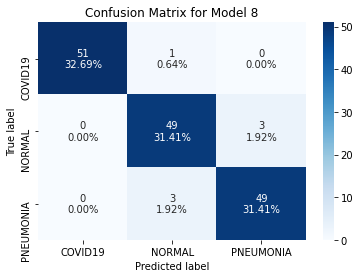

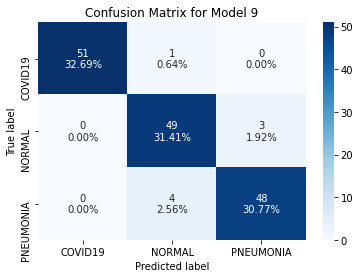

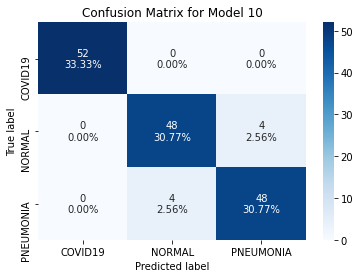

In [ ]:
# Model Evaluation on Unseen Data
for i in range(1, 11):
  reconstructedVGG = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/VGG16/VGG'+str(i)+'.h5')
  predict = reconstructedVGG.predict(XTest)
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  print('Model ' + str(i) + ':\n')
  YCatTest = tf.keras.utils.to_categorical(le.fit_transform(YTest))
  for j in YCatTest:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(i))

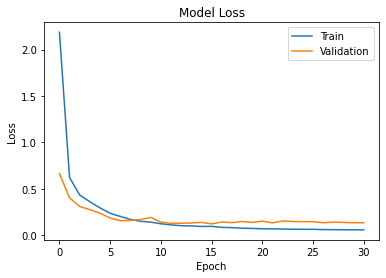

In [ ]:
# Plot Trends in Loss
display_training_curves(historyVGG.history['loss'], historyVGG.history['val_loss'], 'loss')

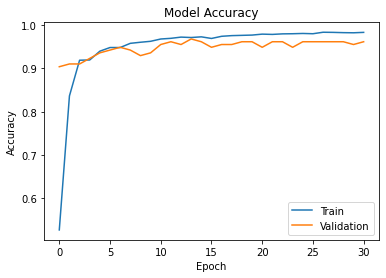

In [ ]:
# Plot Trends in Accuracy
display_training_curves(historyVGG.history['accuracy'], historyVGG.history['val_accuracy'], 'accuracy')

### __Ensembling DenseNet121, ResNet50V2, and VGG16__

_Utilizes Ensemble Learning to concatenate the final probabilities from each individual model._



Augmentation Complete!
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
16/16 [==============================] - 73s 3s/step - loss: 0.8029 - accuracy: 0.6912 - val_loss: 0.1539 - val_accuracy: 0.9551
Epoch 2/50
16/16 [==============================] - 3s 207ms/step - loss: 0.1486 - accuracy: 0.9626 - val_loss: 0.1125 - val_accuracy: 0.9551
Epoch 3/50
16/16 [==============================] - 3s 205ms/step - loss: 0.0949 - accuracy: 0.9697 - val_loss: 0.0849 - val_accuracy: 0.9679
Epoch 4/50
16/16 [==============================] - 3s 202ms/step - loss: 0.0754 - accuracy: 0.9749 - val_loss: 0.0808 - val_accuracy: 0.9744
Epoch 5/50
16/16 [==============================] - 3s 204ms/step - loss: 0.0767 - accuracy: 0.9752 - val_loss: 0.0700 - val_accuracy: 0.9808
Epoch 6/50
16/16 [==============================] - 3s 202ms/step - loss: 0.0661 - accuracy: 0.9772 - val_loss: 0.0603 - val_accuracy: 0.9679
Epoch 7/50
16/16 [==========

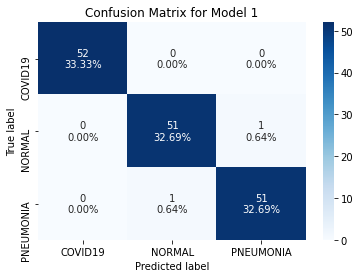

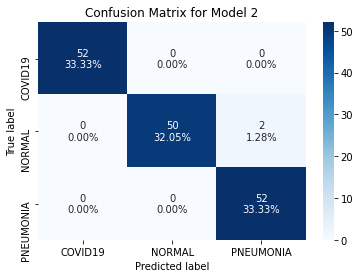

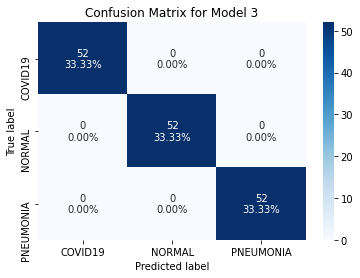

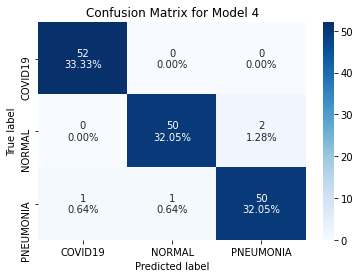

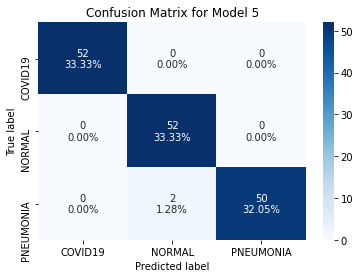

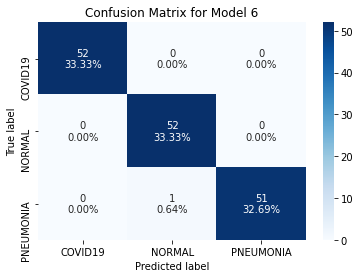

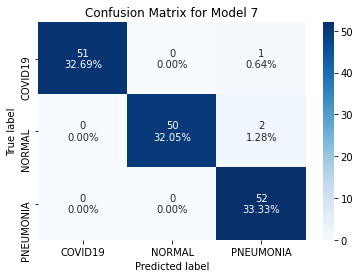

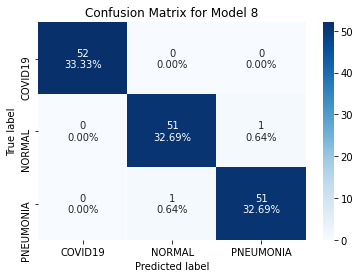

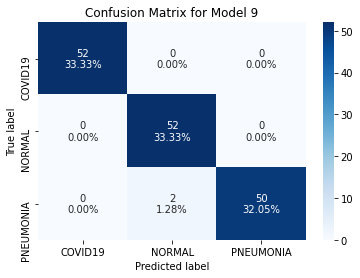

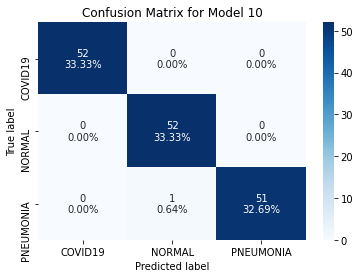

In [ ]:
# Setup StratifiedKFold Cross Validation
kfold = StratifiedKFold(n_splits=10)
accPerFold = []
lossPerFold = []
# K-fold Cross Validation for Model Training
foldNo = 1
# Initialize Label Encoder to encode Target Labels 
le = LabelEncoder()

# Combine the best performing models
with strategy.scope():
  # Load Trained Models
  reconstructedDenseNet = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/DenseNet121/DenseNet6.h5')
  reconstructedResNet = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/ResNet50/ResNet2.h5')
  reconstructedVGG = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/VGG16/VGG1.h5')
            
for train, test in kfold.split(XTrain, YTrain):
  # Data Augmentation
  covidCount = 0
  pneuCount = 0
  normCount = 0

  augmentedDataX = []
  augmentedDataY = []
  
  numAugmented = 0
  # Augmentation Parameters taken from: https://towardsdatascience.com/data-augmentation-in-medical-images-95c774e6eaae
  trainDatagen = ImageDataGenerator(rotation_range = 5, shear_range = 0.02, zoom_range = 0.02, samplewise_center=True, samplewise_std_normalization= True)

  # Use Data Augmentation to generate 600 Images per class
  for XBatch, YBatch in trainDatagen.flow(XTrain[train], YTrain[train], batch_size=1, shuffle=False):
    if (YBatch == 'COVID19'):
      if (covidCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        covidCount += 1
    elif (YBatch == 'PNEUMONIA'):
      if (pneuCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        pneuCount += 1
    else:
      if (normCount == 600):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        normCount += 1
    numAugmented += 1
    if numAugmented == 1800:
      print("\n\nAugmentation Complete!")
      break

  # Concatenate Augmented Data
  augmentedDataX = np.concatenate(augmentedDataX)
  augmentedDataY = np.concatenate(augmentedDataY)
  augmentedDataX = np.concatenate((augmentedDataX, XTrain[train]), axis=0)
  augmentedDataY = np.concatenate((augmentedDataY, YTrain[train]), axis=0)
  
  # Encode Target Labels
  YCatAug = tf.keras.utils.to_categorical(le.fit_transform(augmentedDataY))
  YCatVal = tf.keras.utils.to_categorical(le.fit_transform(YTrain[test]))
  
  with strategy.scope():
    modelDenseNet = Model(inputs = reconstructedDenseNet.input, outputs = reconstructedDenseNet.get_layer("dense_10").output)
    modelResNet = Model(inputs = reconstructedResNet.input, outputs = reconstructedResNet.get_layer("dense_22").output)
    modelVGG = Model(inputs = reconstructedVGG.input, outputs = reconstructedVGG.get_layer("dense_40").output)
    
    # Do not re-train the layers
    for layer in modelDenseNet.layers:
      layer.trainable = False
    for layer in modelResNet.layers:
      layer.trainable = False
    for layer in modelVGG.layers:
      layer.trainable = False

    visible = tf.keras.layers.Input(shape=(imageSize, imageSize, 3), name="input")
    x1 = modelDenseNet(visible)
    x2 = modelResNet(visible)
    x3 = modelVGG(visible)
    # Merging the Models
    merge = tf.keras.layers.concatenate([x1, x2, x3], name="concatenate")
    ensembleModel = tf.keras.layers.Dense(3, activation='softmax', name="predictions")(merge)

    # Compile the Model
    ensembleModel = Model(inputs = visible, outputs = ensembleModel)
    ensembleModel.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {foldNo} ...')

  # Fit data to model and save the best model to Google Drive
  ensembleModelSave = ModelCheckpoint('drive/MyDrive/DissertationDataset/Models/EnsembleXRay/EnsembleXRay' + str(foldNo) + '.h5', save_best_only=True, monitor='val_loss', mode='min')
  historyEnsemble = ensembleModel.fit(augmentedDataX, YCatAug, validation_data = (XTrain[test], YCatVal), callbacks=[lrReduce, esCallback, ensembleModelSave], epochs=50, batch_size=210)
  
  # Generate generalization metrics
  scores = ensembleModel.evaluate(XTrain[test], YCatVal, verbose=0)
  print(f'Score for fold {foldNo}: {ensembleModel.metrics_names[0]} of {scores[0]}; {ensembleModel.metrics_names[1]} of {scores[1]*100}%')
  accPerFold.append(scores[1] * 100)
  lossPerFold.append(scores[0])

  # Increase fold number
  foldNo = foldNo + 1

  # Print out Fold Results, Classification Report, and Confusion Matrix
  predict = ensembleModel.predict(XTrain[test])
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  for j in YCatVal:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(foldNo - 1))

In [ ]:
# Average 10-Fold Cross Validation Accuracy
np.mean(accPerFold)

98.78205299377441

In [ ]:
# Average 10-Fold Cross Validation Loss
np.mean(lossPerFold)

0.03446213533170521

Model 1:

              precision    recall  f1-score   support

     COVID19       1.00      1.00      1.00        52
      NORMAL       0.98      0.96      0.97        52
   PNEUMONIA       0.96      0.98      0.97        52

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156

Model 2:

              precision    recall  f1-score   support

     COVID19       1.00      1.00      1.00        52
      NORMAL       0.96      0.96      0.96        52
   PNEUMONIA       0.96      0.96      0.96        52

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156

Model 3:

              precision    recall  f1-score   support

     COVID19       1.00      1.00      1.00        52
      NORMAL       0.96      0.96      0.96        52
   PNEUMONIA       0.96      0.96      0.96  

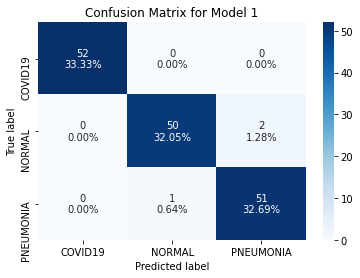

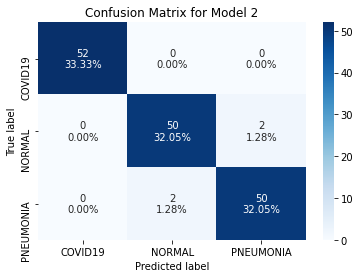

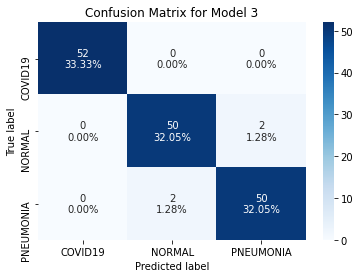

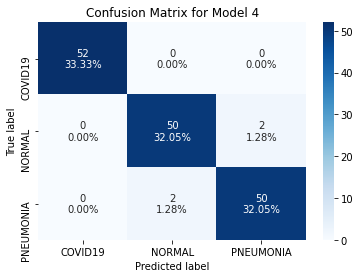

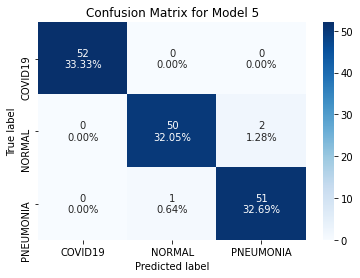

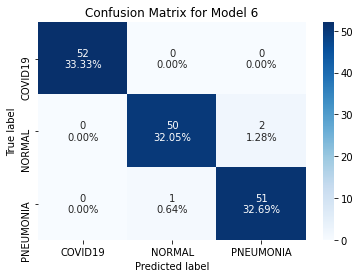

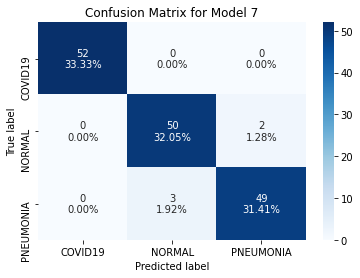

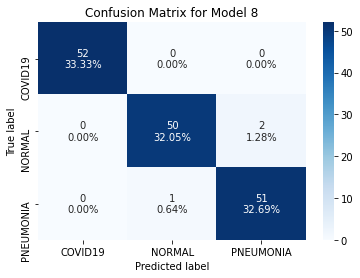

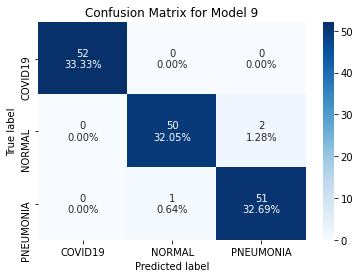

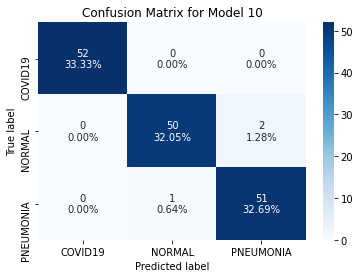

In [ ]:
# Model Evaluation on Unseen Data
for i in range(1, 11):
  reconstructedEnsembleXRay = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/EnsembleXRay/EnsembleXRay' + str(i) + '.h5')
  predict = reconstructedEnsembleXRay.predict(XTest)
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  print('Model ' + str(i) + ':\n')
  YCatTest = tf.keras.utils.to_categorical(le.fit_transform(YTest))
  for j in YCatTest:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(i))

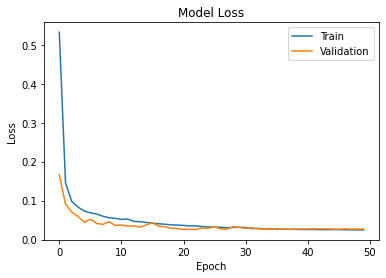

In [ ]:
# Plot Trends in Loss
display_training_curves(historyEnsemble.history['loss'], historyEnsemble.history['val_loss'], 'loss')

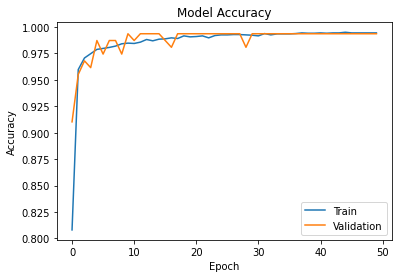

In [ ]:
# Plot Trends in Accuracy
display_training_curves(historyEnsemble.history['accuracy'], historyEnsemble.history['val_accuracy'], 'accuracy')

### __Heatmap Visualization__

In [ ]:
# Load best performing models
reconstructedDenseNet = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/DenseNet121/DenseNet6.h5')
reconstructedResNet = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/ResNet50/ResNet2.h5')
reconstructedVGG = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/VGG16/VGG1.h5')

# Initialize Labels and Layer Names
labels = ["COVID19", "NORMAL", "PNEUMONIA"]
models = [reconstructedDenseNet, reconstructedResNet, reconstructedVGG]
lastConvLayerNames = {"DenseNet": "conv5_block16_concat", "ResNet": "conv5_block3_out", "VGG": "block5_conv3"}
classifierLayerNames = { 
    "DenseNet": [
                  "bn",
                  "relu",
                  "global_average_pooling2d_5",
                  "dense_10",
                  "dense_11",
    ],
    "ResNet": [
               "global_average_pooling2d_11",
               "dense_22",
               "dense_23",
    ],
    "VGG": [
            "block5_pool",
            "global_average_pooling2d_20",
            "dense_40",
            "dense_41",
    ]
}

In [ ]:
def makeDecisionXRay(imagePath, outputPath):
  """
    Function retrieves the heatmap and diagnosis result for a given test image 
  """
  testImage = cv2.imread(imagePath)
  testImage = cv2.resize(testImage, (224, 224), interpolation=cv2.INTER_NEAREST)
  testImage = np.expand_dims(testImage, axis=0)
  heatmaps = []
  for i, model in enumerate(models):
    convLayer = lastConvLayerNames[list(lastConvLayerNames.keys())[i]]
    classifierLayerName = classifierLayerNames[list(classifierLayerNames.keys())[i]]
    heatmap, topIndex = make_gradcam_heatmap(testImage, model, convLayer, classifierLayerName)
    sImg = superimposed_img(testImage[0], heatmap, 224)
    heatmaps.append(sImg)
  
  # Create a numpy array of floats to store the average (assume RGB images)
  finalHeatmap = np.zeros((224, 224,3), np.float)
  for im in heatmaps:
    imageArray = np.array(im, dtype = np.float)
    # N = 3, because of 3 separate images to be combined
    finalHeatmap = finalHeatmap + imageArray/3
  
  # Round values in array and cast as 8-bit integer
  finalHeatmap = np.array(np.round(finalHeatmap), dtype = np.uint8)
  outputImage = Image.fromarray(finalHeatmap, mode="RGB")
  outputImage.save(os.path.join(outputPath, 'heatmap.jpg'))

  reconstructedEnsembleXRay = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/EnsembleXRay/EnsembleXRay1.h5')
  predictionIndex = np.argmax(reconstructedEnsembleXRay.predict(testImage))

  # Store the result in a map 
  jsonResult = {}
  jsonResult['ImagePath'] = outputPath
  jsonResult['Diagnosis'] = labels[predictionIndex]
  jsonResult['Accuracy'] = '98%'
  with open(os.path.join(outputPath, 'result.json'), 'w') as f:
    json.dump(jsonResult, f)

  return finalHeatmap, labels[predictionIndex]

#### __COVID-19 Scans__

In [ ]:
# Get all images provided Folder Path, and generate results
outputPathCOVID = "drive/MyDrive/DissertationDataset/Sample Results/X-Ray/COVID19/"
covid19Scans = glob.glob("drive/MyDrive/DissertationDataset/Sample Scans/X-Ray/COVID19/*")
results = []
for i, path in enumerate(covid19Scans):
  os.makedirs(outputPathCOVID + str(i + 1), exist_ok=True)
  finalHeatmap, prediction = makeDecisionXRay(covid19Scans[i], os.path.join(outputPathCOVID, str(i + 1)))
  results.append((finalHeatmap, prediction))

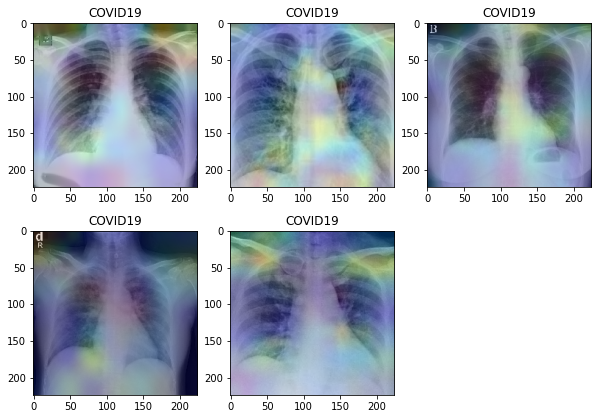

In [ ]:
# Display all the heatmaps generated
fig = plt.figure(figsize=(10,7))
columns = 3
rows = 2
a = np.random.rand(2,3)
for i in range(5):
    fig.add_subplot(2, 3, i + 1)
    plt.imshow(results[i][0])  
    plt.title(results[i][1])
plt.show()

#### __Pneumonia Scans__

In [ ]:
# Get all images provided Folder Path, and generate results
outputPathPneumonia = "drive/MyDrive/DissertationDataset/Sample Results/X-Ray/PNEUMONIA/"
pneumoniaScans = glob.glob("drive/MyDrive/DissertationDataset/Sample Scans/X-Ray/PNEUMONIA/*")
results = []
for i, path in enumerate(pneumoniaScans):
  os.makedirs(outputPathPneumonia + str(i + 1), exist_ok=True)
  finalHeatmap, prediction = makeDecisionXRay(pneumoniaScans[i], os.path.join(outputPathPneumonia, str(i + 1)))
  results.append((finalHeatmap, prediction))

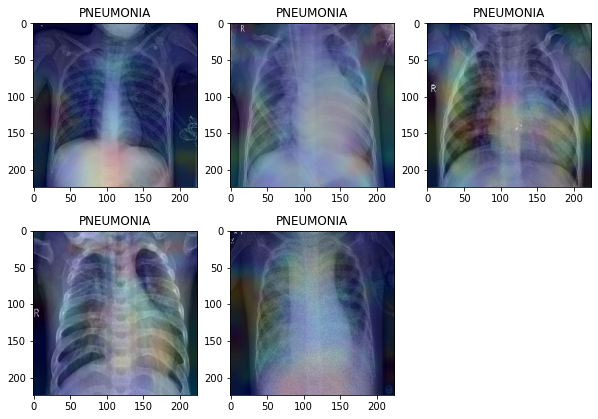

In [ ]:
# Display all the heatmaps generated
fig = plt.figure(figsize=(10,7))
columns = 3
rows = 2
a = np.random.rand(2,3)
for i in range(5):
    fig.add_subplot(2, 3, i+1)
    plt.imshow(results[i][0])  
    plt.title(results[i][1])
plt.show()

## __CT Scans__

### __Extract Lung Parenchyma__

In [ ]:
# Preprocess the CT Scans to extract the lung parenchyma
def renameFiles(scanType):
  """
  Rename the files in a directory 
  to maintain naming consistency.
  """
  path = 'CTData/' + scanType
  files = os.listdir(path)
  for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, ''.join([scanType + str(index + 10000), '.jpg'])))

def splitTargetDir(targetDir, outputDir):
  """
  Calls the function to split the lung parenchyma 
  for each scan in the dataset directory.
  """
  targetList = [targetDir + os.sep + file for file in os.listdir(targetDir)]
  for target in targetList:
      try:
        imgSplit = splitLungParenchyma(target,15599,-96)
      except:
        continue
      dst = target.replace(targetDir, outputDir)
      dstDir = os.path.split(dst)[0]
      if not os.path.exists(dstDir):
          os.makedirs(dstDir)
      cv2.imencode('.jpg', imgSplit)[1].tofile(dst)
  print(f'Target list done with {len(targetList)} items')
    
def splitLungParenchyma(target, size, thr):
  """
  Function extracts the lung parenchyma from the provided CT scan.
  Code excerpt taken from:
  https://www.kaggle.com/azaemon/starter-keras-implementation 
  As per the the following journal article:
  https://europepmc.org/article/ppr/ppr141530
  """
  img = cv2.imdecode(np.fromfile(target, dtype = np.uint8), cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (512, 512))
  try:
      imgThr = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,size,thr).astype(np.uint8)
  except:
      imgThr = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,999,thr).astype(np.uint8)
  imgThr = 255 - imgThr
  imgTest = measure.label(imgThr, connectivity = 1)
  props = measure.regionprops(imgTest)
  imgTest.max()
  areas = [prop.area for prop in props]
  indMaxArea = np.argmax(areas) + 1
  delArray = np.zeros(imgTest.max() + 1)
  delArray[indMaxArea] = 1
  delMask = delArray[imgTest]
  imgNew = imgThr * delMask
  maskFill = fillWater(imgNew)
  imgNew[maskFill == 1] = 255
  imgOut = img*~imgNew.astype(bool)
  return imgOut

def fillWater(img):
  """
  Applies filter masks to the extracted lung parenchyma. 
  """
  copyImg = img.copy()
  copyImg.astype(np.float32)
  height, width = img.shape
  imgExp = np.zeros((height+20, width+20))
  heightExp, widthExp = imgExp.shape
  imgExp[10:-10, 10:-10] = copyImg
  mask1 = np.zeros([height + 22, width + 22], np.uint8)   
  mask2 = mask1.copy()
  mask3 = mask1.copy()
  mask4 = mask1.copy()
  cv2.floodFill(np.float32(imgExp), mask1, (0, 0), 1) 
  cv2.floodFill(np.float32(imgExp), mask2, (heightExp-1, widthExp-1), 1) 
  cv2.floodFill(np.float32(imgExp), mask3, (heightExp-1, 0), 1) 
  cv2.floodFill(np.float32(imgExp), mask4, (0, widthExp-1), 1)
  mask = mask1 | mask2 | mask3 | mask4
  output = mask[1:-1, 1:-1][10:-10, 10:-10]
  return output

In [ ]:
# Renaming the Positive and Negative Cases
# renameFiles('pCT')
# renameFiles('nCT')

In [ ]:
# Call Preprocessing functions
# splitTargetDir('CTData/nCT', 'CTDataProcessed/NORMAL')
# splitTargetDir('CTData/pCT', 'CTDataProcessed/COVID19')

In [ ]:
# Zip and save the files in Google Drive
# !zip -r "CTDataProcessed.zip" "CTDataProcessed"
# !mv "CTDataProcessed.zip" "drive/MyDrive/"

### __Loading Data__

In [ ]:
# !unzip 'drive/MyDrive/DissertationDataset/Preprocessed CT scans.zip' -d 'drive/MyDrive/DissertationDataset/CTData/train'

Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9081.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9082.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9083.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9084.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9085.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9086.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9087.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9088.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9089.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT909.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9090.jpg  
  inflating: drive/MyDrive/DissertationDataset/CTData/train/nCT/nCT9091.jpg  
  inflating: d

In [ ]:
# Move 11th fold (approx. 363) of X-Ray Scans from each class to test folder
# fromDir = "drive/MyDrive/DissertationDataset/CTData/train" 
# toDir = "drive/MyDrive/DissertationDataset/CTData/test"

# classesDir = ["nCT", "pCT"]

# for i in classesDir:
#   files = [f for f in os.listdir(os.path.join(fromDir, i))]
#   randomSample = random.sample(files, 363)
#   for j in randomSample:
#     shutil.move(os.path.join(os.path.join(fromDir, i), j), os.path.join(toDir, i))

In [ ]:
# Remove NiCT Folder
# shutil.rmtree('drive/MyDrive/DissertationDataset/CTData/train/NiCT')

In [ ]:
# Keep only 3630 images from each of the 2 Non COVID-19 classes
# !find 'drive/MyDrive/DissertationDataset/CTData/train/pCT' -type f -print0 | sort -zR | tail -zn +3631 | xargs -0 rm
# !find 'drive/MyDrive/DissertationDataset/CTData/train/nCT' -type f -print0 | sort -zR | tail -zn +3631 | xargs -0 rm

In [ ]:
# dataPathTrain = 'drive/MyDrive/DissertationDataset/CTData/train/*/*.jpg'
# dataPathTest = 'drive/MyDrive/DissertationDataset/CTData/test/*/*.jpg'
# # Get all the image paths 
# addrsTrain = glob.glob(dataPathTrain)
# addrsTest = glob.glob(dataPathTest)

In [ ]:
def getData(paths):
  """
    Function iterates through all the images present in the folder path and 
    generates two numpy arrays, one for the image and another for their 
    respective labels for model training purposes.
  """
  X = []
  Y = []
  for i, j in enumerate(paths):
    img=cv2.imread(j, cv2.IMREAD_COLOR) 
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(128, 128), interpolation=cv2.INTER_AREA)
    X.append(img)
    if ('pCT' in j):
      Y.append('COVID19')
    else:
      Y.append('NORMAL')
    print('Processed: ' + str(i + 1) + '/' + str(len(paths)))
  return np.array(X), np.array(Y)

In [ ]:
# XTrain, YTrain = getData(addrsTrain)

Streaming output truncated to the last 5000 lines.
Processed: 2261/7260
Processed: 2262/7260
Processed: 2263/7260
Processed: 2264/7260
Processed: 2265/7260
Processed: 2266/7260
Processed: 2267/7260
Processed: 2268/7260
Processed: 2269/7260
Processed: 2270/7260
Processed: 2271/7260
Processed: 2272/7260
Processed: 2273/7260
Processed: 2274/7260
Processed: 2275/7260
Processed: 2276/7260
Processed: 2277/7260
Processed: 2278/7260
Processed: 2279/7260
Processed: 2280/7260
Processed: 2281/7260
Processed: 2282/7260
Processed: 2283/7260
Processed: 2284/7260
Processed: 2285/7260
Processed: 2286/7260
Processed: 2287/7260
Processed: 2288/7260
Processed: 2289/7260
Processed: 2290/7260
Processed: 2291/7260
Processed: 2292/7260
Processed: 2293/7260
Processed: 2294/7260
Processed: 2295/7260
Processed: 2296/7260
Processed: 2297/7260
Processed: 2298/7260
Processed: 2299/7260
Processed: 2300/7260
Processed: 2301/7260
Processed: 2302/7260
Processed: 2303/7260
Processed: 2304/7260
Processed: 2305/7260
Proc

In [ ]:
# XTrain.shape, YTrain.shape

((7260, 128, 128, 3), (7260,))

In [ ]:
# XTest, YTest = getData(addrsTest)

Processed: 1/726
Processed: 2/726
Processed: 3/726
Processed: 4/726
Processed: 5/726
Processed: 6/726
Processed: 7/726
Processed: 8/726
Processed: 9/726
Processed: 10/726
Processed: 11/726
Processed: 12/726
Processed: 13/726
Processed: 14/726
Processed: 15/726
Processed: 16/726
Processed: 17/726
Processed: 18/726
Processed: 19/726
Processed: 20/726
Processed: 21/726
Processed: 22/726
Processed: 23/726
Processed: 24/726
Processed: 25/726
Processed: 26/726
Processed: 27/726
Processed: 28/726
Processed: 29/726
Processed: 30/726
Processed: 31/726
Processed: 32/726
Processed: 33/726
Processed: 34/726
Processed: 35/726
Processed: 36/726
Processed: 37/726
Processed: 38/726
Processed: 39/726
Processed: 40/726
Processed: 41/726
Processed: 42/726
Processed: 43/726
Processed: 44/726
Processed: 45/726
Processed: 46/726
Processed: 47/726
Processed: 48/726
Processed: 49/726
Processed: 50/726
Processed: 51/726
Processed: 52/726
Processed: 53/726
Processed: 54/726
Processed: 55/726
Processed: 56/726
P

In [ ]:
# XTest.shape, YTest.shape

((726, 128, 128, 3), (726,))

In [ ]:
# XTrain, YTrain = shuffle(XTrain, YTrain, random_state=0)
# XTest, YTest = shuffle(XTest, YTest, random_state=0)

In [ ]:
# Find total length
# len(XTrain), len(XTest), len(YTrain), len(YTest) 

(7260, 726, 7260, 726)

In [ ]:
# Find length per class
# len(YTrain[YTrain == 'COVID19']), len(YTrain[YTrain == 'NORMAL'])

(3630, 3630)

In [ ]:
# Find length per class
# len(YTest[YTest == 'COVID19']), len(YTest[YTest == 'NORMAL'])

(363, 363)

In [ ]:
# Save arrays for faster loading
# with open('drive/MyDrive/DissertationDataset/XTrainCT.npy', 'wb') as f:
#     np.save(f, XTrain)

# with open('drive/MyDrive/DissertationDataset/XTestCT.npy', 'wb') as f:
#     np.save(f, XTest)

# with open('drive/MyDrive/DissertationDataset/YTrainCT.npy', 'wb') as f:
#     np.save(f, YTrain)

# with open('drive/MyDrive/DissertationDataset/YTestCT.npy', 'wb') as f:
#     np.save(f, YTest)

In [ ]:
# Code above commented as Processed Dataset saved as .npy files, saves processing time!
# Load the saved dataset
with open('drive/MyDrive/DissertationDataset/XTrainCT.npy', 'rb') as f:
  XTrain = np.load(f)

with open('drive/MyDrive/DissertationDataset/XTestCT.npy', 'rb') as f:
  XTest = np.load(f)

with open('drive/MyDrive/DissertationDataset/YTrainCT.npy', 'rb') as f:
  YTrain = np.load(f)

with open('drive/MyDrive/DissertationDataset/YTestCT.npy', 'rb') as f:
  YTest = np.load(f)

In [ ]:
# Setting Image Size
imageSize = 128

### __Pretrained UNet__

_Utilizes Transfer Learning Technique._

A pretrained UNet model on the ImageNet dataset is used to compromise for the limited dataset size.



Augmentation Complete!
94674944/94668760 [==============================] - 1s 0us/step
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/200
11/11 [==============================] - 71s 4s/step - loss: 0.6936 - accuracy: 0.5018 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/200
11/11 [==============================] - 4s 326ms/step - loss: 0.6933 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.4931
Epoch 3/200
11/11 [==============================] - 4s 324ms/step - loss: 0.6913 - accuracy: 0.5141 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 4/200
11/11 [==============================] - 4s 353ms/step - loss: 0.6750 - accuracy: 0.5838 - val_loss: 0.7800 - val_accuracy: 0.5000
Epoch 5/200
11/11 [==============================] - 4s 324ms/step - loss: 0.6319 - accuracy: 0.6195 - val_loss: 1.1302 - val_accuracy: 0.5000
Epoch 6/200
11/11 [==============================] - 4s 327ms/step - loss: 0.5886 - accuracy: 0.6595

              precision    recall  f1-score   support

     COVID19       0.96      0.96      0.96       363
      NORMAL       0.96      0.96      0.96       363

    accuracy                           0.96       726
   macro avg       0.96      0.96      0.96       726
weighted avg       0.96      0.96      0.96       726



Augmentation Complete!
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/200
11/11 [==============================] - 68s 4s/step - loss: 0.6935 - accuracy: 0.5028 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 2/200
11/11 [==============================] - 4s 330ms/step - loss: 0.6864 - accuracy: 0.5488 - val_loss: 0.8597 - val_accuracy: 0.5000
Epoch 3/200
11/11 [==============================] - 4s 326ms/step - loss: 0.6369 - accuracy: 0.6284 - val_loss: 2.2189 - val_accuracy: 0.5000
Epoch 4/200
11/11 [==============================] - 5s 501ms/step - loss: 0.5844 - accuracy: 0.6611 - val_loss: 2.7343 - va

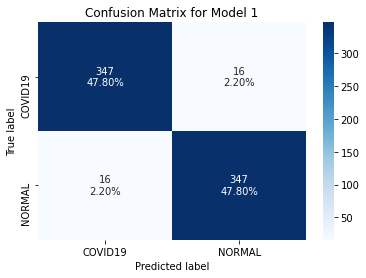

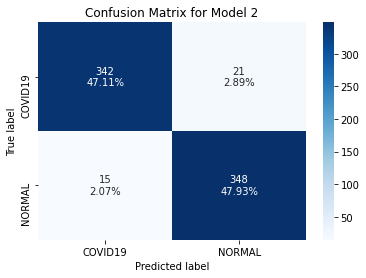

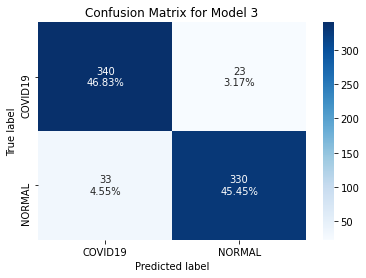

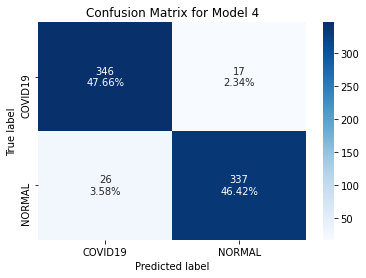

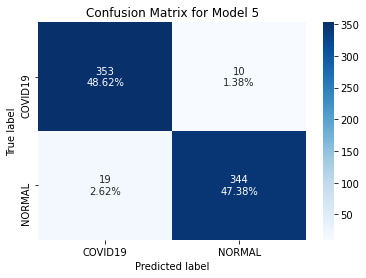

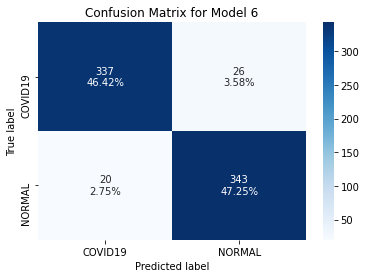

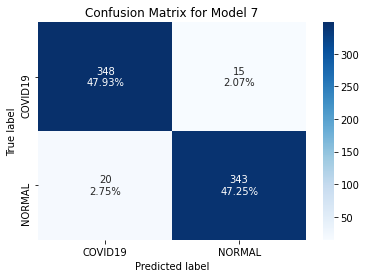

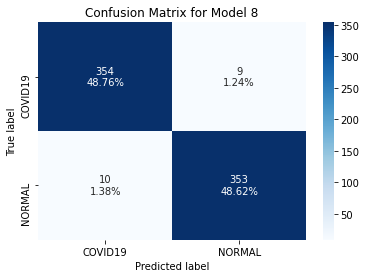

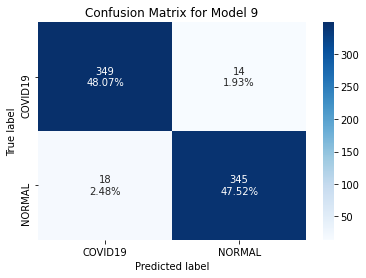

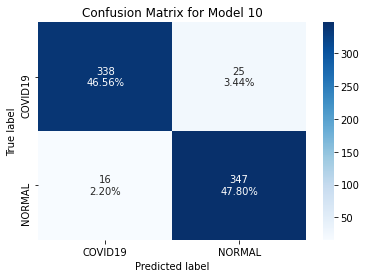

In [ ]:
# Setup StratifiedKFold Cross Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accPerFold = []
lossPerFold = []
# K-fold Cross Validation for Model Training
foldNo = 1
# Initialize Label Encoder to encode Target Labels 
le = LabelEncoder()
for train, test in kfold.split(XTrain, YTrain):
  # Data Augmentation
  covidCount = 0
  normCount = 0

  augmentedDataX = []
  augmentedDataY = []
  
  numAugmented = 0
  # Augmentation Parameters taken from: https://towardsdatascience.com/data-augmentation-in-medical-images-95c774e6eaae
  trainDatagen = ImageDataGenerator(rotation_range = 5, shear_range = 0.02, zoom_range = 0.02, samplewise_center=True, samplewise_std_normalization= True)

  # Use Data Augmentation to generate 2000 Images per class
  for XBatch, YBatch in trainDatagen.flow(XTrain[train], YTrain[train], batch_size=1, shuffle=False):
    if (YBatch == 'COVID19'):
      if (covidCount == 2000):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        covidCount += 1
    else:
      if (normCount == 2000):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        normCount += 1
    numAugmented += 1
    if numAugmented == 4000:
      print("\n\nAugmentation Complete!")
      break

  # Concatenate Augmented Data
  augmentedDataX = np.concatenate(augmentedDataX)
  augmentedDataY = np.concatenate(augmentedDataY)
  augmentedDataX = np.concatenate((augmentedDataX, XTrain[train]), axis=0)
  augmentedDataY = np.concatenate((augmentedDataY, YTrain[train]), axis=0)
  
  # Encode Target Labels
  YCatAug = tf.keras.utils.to_categorical(le.fit_transform(augmentedDataY))
  YCatVal = tf.keras.utils.to_categorical(le.fit_transform(YTrain[test]))
  # Begin Training
  with strategy.scope():
    # Load pre-trained model to apply Transfer Learning
    pretrainedUNet = kerasModels.unet_2d((imageSize, imageSize, 3), filter_num=[64, 128, 256, 512, 1024], n_labels=2, 
                           stack_num_down=2, stack_num_up=2, activation='ReLU', 
                            output_activation='Sigmoid', 
                           batch_norm=True, pool=False, unpool=False, 
                           backbone='ResNet50V2', weights='imagenet', 
                           freeze_backbone=True, freeze_batch_norm=True, 
                           name='unet')  
    x1 = pretrainedUNet.output
    x1 = tf.keras.layers.GlobalAveragePooling2D()(x1)
    x1 = tf.keras.layers.Dense(1024, activation='relu')(x1)
    x1 = tf.keras.layers.Dense(1024, activation='relu')(x1)
    x1 = tf.keras.layers.Dense(512, activation='relu')(x1)
    predictions = tf.keras.layers.Dense(2, activation='sigmoid')(x1)
  
    # Set only the last layer to be trainable
    for layer in pretrainedUNet.layers[:43]:
      layer.trainable = False
  
    for layer in pretrainedUNet.layers[43:]:
      layer.trainable = True 
      
    # Compile the Model
    modelUNet = Model(inputs = pretrainedUNet.input, outputs = predictions)
    modelUNet.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {foldNo} ...')

  # Fit data to model and save the best model to Google Drive
  mcpSaveUNet = ModelCheckpoint('drive/MyDrive/DissertationDataset/Models/UNet/UNet' + str(foldNo) + '.h5', save_best_only=True, monitor='val_loss', mode='min')
  UNetESCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=80, verbose=1)
  historyUNet = modelUNet.fit(augmentedDataX, YCatAug, validation_data = (XTrain[test], YCatVal), callbacks=[UNetESCallback, lrReduce, mcpSaveUNet], epochs=200, batch_size=1024)

  # Generate generalization metrics
  scores = modelUNet.evaluate(XTrain[test], YCatVal, verbose=0)
  print(f'Score for fold {foldNo}: {modelUNet.metrics_names[0]} of {scores[0]}; {modelUNet.metrics_names[1]} of {scores[1]*100}%')
  accPerFold.append(scores[1] * 100)
  lossPerFold.append(scores[0])

  # Increase fold number
  foldNo = foldNo + 1

  # Print out Fold Results, Classification Report, and Confusion Matrix
  predict = modelUNet.predict(XTrain[test])
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  for j in YCatVal:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(foldNo - 1))

In [ ]:
# Average 10-Fold Cross Validation Accuracy
np.mean(accPerFold)

94.91735696792603

In [ ]:
# Average 10-Fold Cross Validation Loss
np.mean(lossPerFold)

0.1367212288081646

Model 1:

              precision    recall  f1-score   support

     COVID19       0.94      0.96      0.95       363
      NORMAL       0.96      0.94      0.95       363

    accuracy                           0.95       726
   macro avg       0.95      0.95      0.95       726
weighted avg       0.95      0.95      0.95       726

Model 2:

              precision    recall  f1-score   support

     COVID19       0.94      0.96      0.95       363
      NORMAL       0.96      0.94      0.95       363

    accuracy                           0.95       726
   macro avg       0.95      0.95      0.95       726
weighted avg       0.95      0.95      0.95       726

Model 3:

              precision    recall  f1-score   support

     COVID19       0.94      0.92      0.93       363
      NORMAL       0.92      0.94      0.93       363

    accuracy                           0.93       726
   macro avg       0.93      0.93      0.93       726
weighted avg       0.93      0.93      0.93 

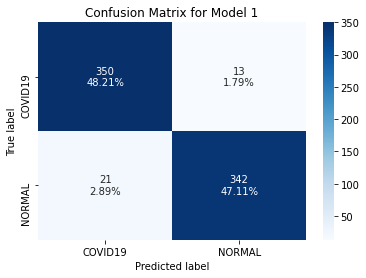

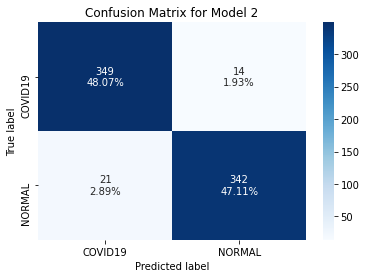

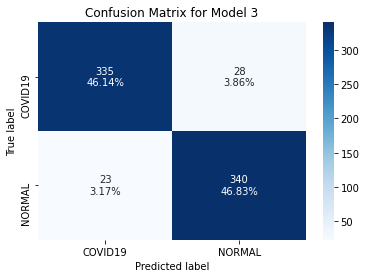

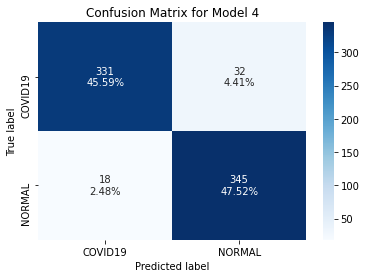

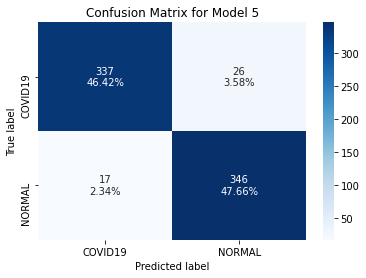

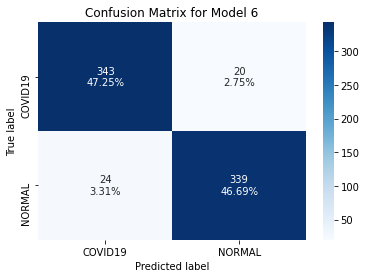

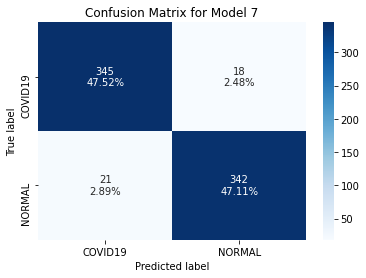

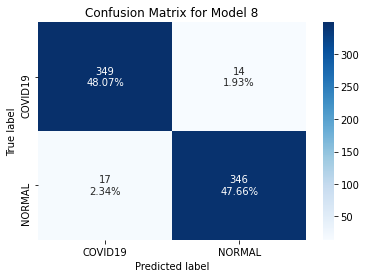

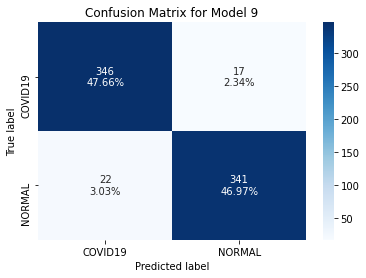

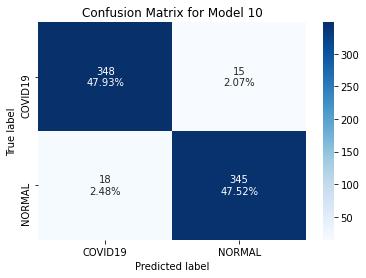

In [ ]:
# Model Evaluation on Unseen Data
for i in range(1, 11):
  reconstructedUNet = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/UNet/UNet'+str(i)+'.h5')
  predict = reconstructedUNet.predict(XTest)
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  print('Model ' + str(i) + ':\n')
  YCatTest = tf.keras.utils.to_categorical(le.fit_transform(YTest))
  for j in YCatTest:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(i))

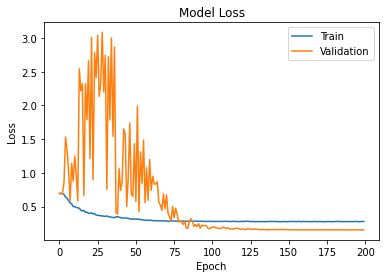

In [ ]:
# Plot Trends in Loss
display_training_curves(historyUNet.history['loss'], historyUNet.history['val_loss'], 'loss')

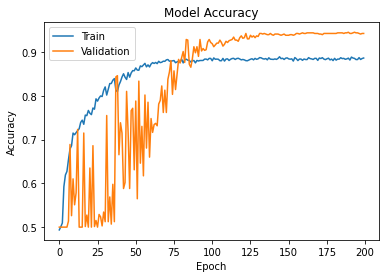

In [ ]:
# Plot Trends in Accuracy
display_training_curves(historyUNet.history['accuracy'], historyUNet.history['val_accuracy'], 'accuracy')

### __Pretrained Attention UNet__

_Utilizes Transfer Learning Technique._

A pretrained Attention UNet model on the ImageNet dataset is used to compromise for the limited dataset size.



Augmentation Complete!
94674944/94668760 [==============================] - 1s 0us/step
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/200
11/11 [==============================] - 68s 4s/step - loss: 0.6929 - accuracy: 0.5142 - val_loss: 0.6973 - val_accuracy: 0.5041
Epoch 2/200
11/11 [==============================] - 4s 356ms/step - loss: 0.6712 - accuracy: 0.6148 - val_loss: 1.1436 - val_accuracy: 0.5000
Epoch 3/200
11/11 [==============================] - 4s 356ms/step - loss: 0.6000 - accuracy: 0.6469 - val_loss: 1.9679 - val_accuracy: 0.5000
Epoch 4/200
11/11 [==============================] - 4s 365ms/step - loss: 0.5519 - accuracy: 0.6822 - val_loss: 2.4562 - val_accuracy: 0.5000
Epoch 5/200
11/11 [==============================] - 4s 356ms/step - loss: 0.5271 - accuracy: 0.6918 - val_loss: 2.9651 - val_accuracy: 0.5000
Epoch 6/200
11/11 [==============================] - 4s 356ms/step - loss: 0.4840 - accuracy: 0.7160

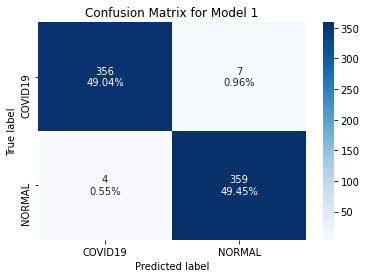

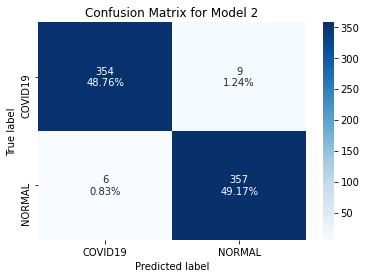

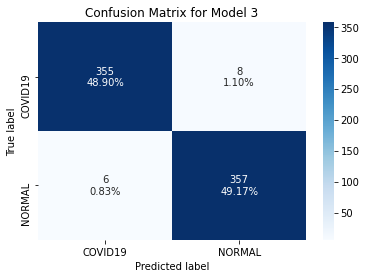

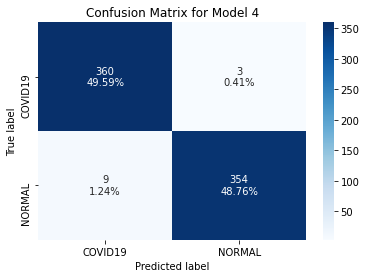

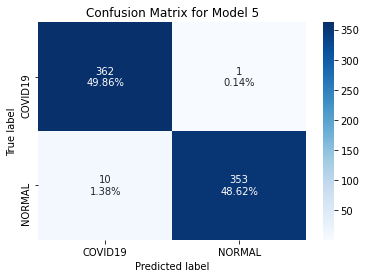

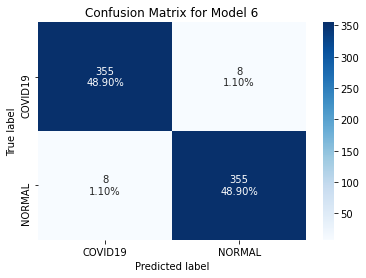

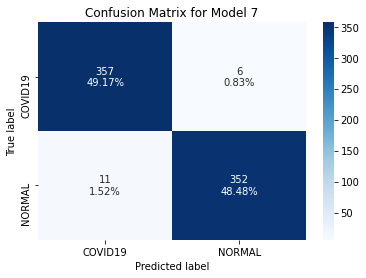

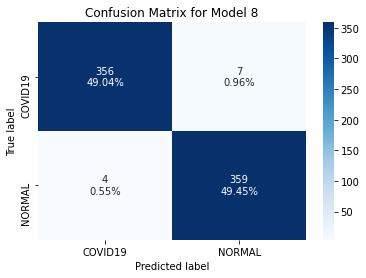

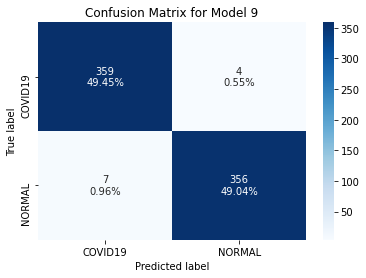

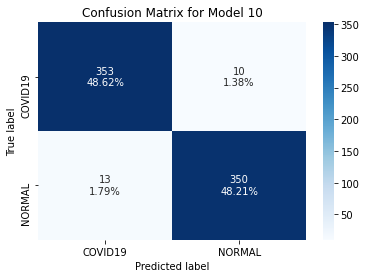

In [ ]:
# Setup StratifiedKFold Cross Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accPerFold = []
lossPerFold = []
# K-fold Cross Validation for Model Training
foldNo = 1
# Initialize Label Encoder to encode Target Labels 
le = LabelEncoder()
for train, test in kfold.split(XTrain, YTrain):
  # Data Augmentation
  covidCount = 0
  normCount = 0

  augmentedDataX = []
  augmentedDataY = []
  
  numAugmented = 0
  # Augmentation Parameters taken from: https://towardsdatascience.com/data-augmentation-in-medical-images-95c774e6eaae
  trainDatagen = ImageDataGenerator(rotation_range = 5, shear_range = 0.02, zoom_range = 0.02, samplewise_center=True, samplewise_std_normalization= True)

  # Use Data Augmentation to generate 2000 Images per class
  for XBatch, YBatch in trainDatagen.flow(XTrain[train], YTrain[train], batch_size=1, shuffle=False):
    if (YBatch == 'COVID19'):
      if (covidCount == 2000):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        covidCount += 1
    else:
      if (normCount == 2000):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        normCount += 1
    numAugmented += 1
    if numAugmented == 4000:
      print("\n\nAugmentation Complete!")
      break

  # Concatenate Augmented Data
  augmentedDataX = np.concatenate(augmentedDataX)
  augmentedDataY = np.concatenate(augmentedDataY)
  augmentedDataX = np.concatenate((augmentedDataX, XTrain[train]), axis=0)
  augmentedDataY = np.concatenate((augmentedDataY, YTrain[train]), axis=0)
  
  # Encode Target Labels
  YCatAug = tf.keras.utils.to_categorical(le.fit_transform(augmentedDataY))
  YCatVal = tf.keras.utils.to_categorical(le.fit_transform(YTrain[test]))
  # Begin Training
  with strategy.scope():
    # Load pre-trained model to apply Transfer Learning
    pretrainedAttUNet = kerasModels.att_unet_2d((imageSize, imageSize, 3), filter_num=[64, 128, 256, 512, 1024], n_labels=2, 
                           stack_num_down=2, stack_num_up=2, activation='ReLU', 
                           atten_activation='ReLU', attention='add', output_activation='Sigmoid', 
                           batch_norm=True, pool=False, unpool=False, 
                           backbone='ResNet50V2', weights='imagenet', 
                           freeze_backbone=True, freeze_batch_norm=True, 
                           name='attunet')   
    x1 = pretrainedAttUNet.output
    x1 = tf.keras.layers.GlobalAveragePooling2D()(x1)
    x1 = tf.keras.layers.Dense(1024, activation='relu')(x1)
    x1 = tf.keras.layers.Dense(1024, activation='relu')(x1)
    x1 = tf.keras.layers.Dense(512, activation='relu')(x1)
    predictions = tf.keras.layers.Dense(2, activation='sigmoid')(x1)
  
    # Set only the last layer to be trainable
    for layer in pretrainedAttUNet.layers[:46]:
      layer.trainable = False
  
    for layer in pretrainedAttUNet.layers[46:]:
      layer.trainable = True 
  
    # Compile the Model
    modelAttUNet = Model(inputs = pretrainedAttUNet.input, outputs = predictions)
    modelAttUNet.compile(optimizer=tf.optimizers.Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {foldNo} ...')

  # Fit data to model and save the best model to Google Drive
  mcpSaveAttUNet = ModelCheckpoint('drive/MyDrive/DissertationDataset/Models/AttUNet/AttUNet' + str(foldNo) + '.h5', save_best_only=True, monitor='val_loss', mode='min')
  AttUNetESCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=80, verbose=1)
  historyAttUNet = modelAttUNet.fit(augmentedDataX, YCatAug, validation_data = (XTrain[test], YCatVal), callbacks=[AttUNetESCallback, lrReduce, mcpSaveAttUNet], epochs=200, batch_size=1024)

  # Generate generalization metrics
  scores = modelAttUNet.evaluate(XTrain[test], YCatVal, verbose=0)
  print(f'Score for fold {foldNo}: {modelAttUNet.metrics_names[0]} of {scores[0]}; {modelAttUNet.metrics_names[1]} of {scores[1]*100}%')
  accPerFold.append(scores[1] * 100)
  lossPerFold.append(scores[0])

  # Increase fold number
  foldNo = foldNo + 1

  # Print out Fold Results, Classification Report, and Confusion Matrix
  predict = modelAttUNet.predict(XTrain[test])
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  for j in YCatVal:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(foldNo - 1))

In [ ]:
# Average 10-Fold Cross Validation Accuracy
np.mean(accPerFold)

98.05785298347473

In [ ]:
# Average 10-Fold Cross Validation Loss
np.mean(lossPerFold)

0.05714163817465305

Model 1:

              precision    recall  f1-score   support

     COVID19       0.97      0.99      0.98       363
      NORMAL       0.99      0.97      0.98       363

    accuracy                           0.98       726
   macro avg       0.98      0.98      0.98       726
weighted avg       0.98      0.98      0.98       726

Model 2:

              precision    recall  f1-score   support

     COVID19       0.99      0.99      0.99       363
      NORMAL       0.99      0.99      0.99       363

    accuracy                           0.99       726
   macro avg       0.99      0.99      0.99       726
weighted avg       0.99      0.99      0.99       726

Model 3:

              precision    recall  f1-score   support

     COVID19       0.99      0.99      0.99       363
      NORMAL       0.99      0.99      0.99       363

    accuracy                           0.99       726
   macro avg       0.99      0.99      0.99       726
weighted avg       0.99      0.99      0.99 

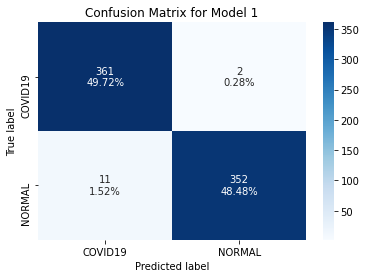

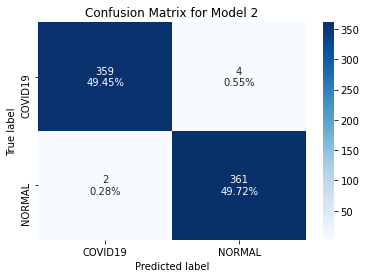

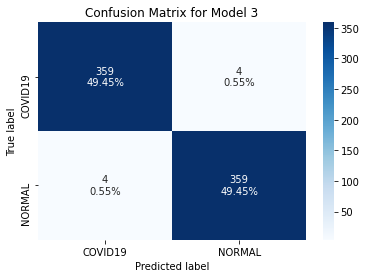

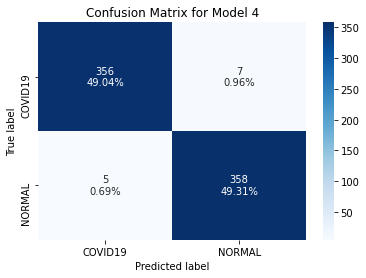

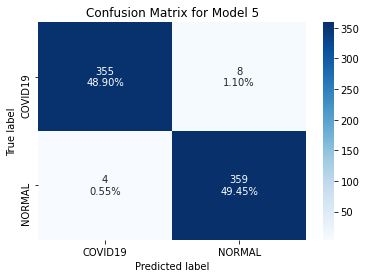

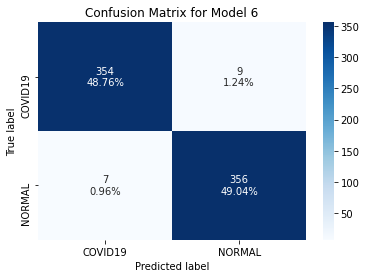

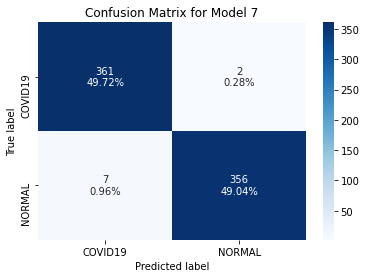

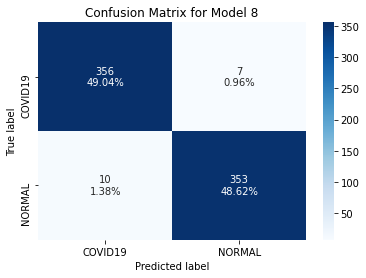

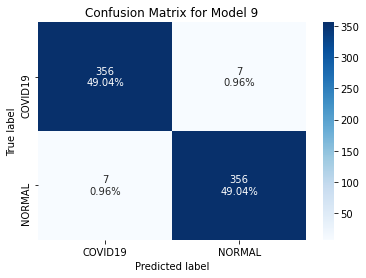

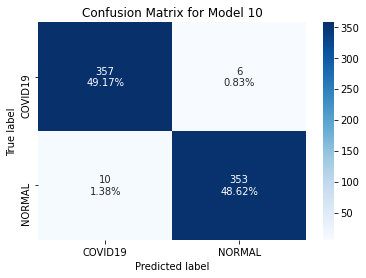

In [ ]:
# Model Evaluation on Unseen Data
for i in range(1, 11):
  reconstructedAttUNet = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/AttUNet/AttUNet'+str(i)+'.h5')
  predict = reconstructedAttUNet.predict(XTest)
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  print('Model ' + str(i) + ':\n')
  YCatTest = tf.keras.utils.to_categorical(le.fit_transform(YTest))
  for j in YCatTest:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(i))

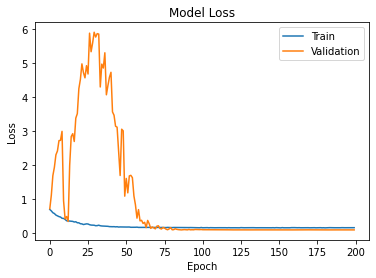

In [ ]:
# Plot Trends in Loss
display_training_curves(historyAttUNet.history['loss'], historyAttUNet.history['val_loss'], 'loss')

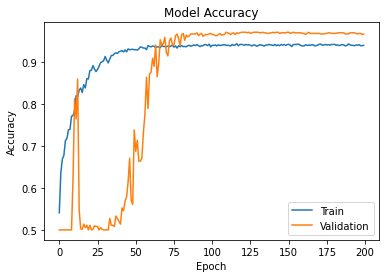

In [ ]:
# Plot Trends in Accuracy
display_training_curves(historyAttUNet.history['accuracy'], historyAttUNet.history['val_accuracy'], 'accuracy')

### __Pretrained UNet++__

_Utilizes Transfer Learning Technique._

A pretrained UNet++ model on the ImageNet dataset is used to compromise for the limited dataset size.

Streaming output truncated to the last 5000 lines.
11/11 [==============================] - 3s 283ms/step - loss: 0.4995 - accuracy: 0.7102 - val_loss: 6.2476 - val_accuracy: 0.5000
Epoch 44/300
11/11 [==============================] - 3s 286ms/step - loss: 0.4982 - accuracy: 0.7059 - val_loss: 6.3131 - val_accuracy: 0.5000
Epoch 45/300
11/11 [==============================] - 3s 285ms/step - loss: 0.4978 - accuracy: 0.7074 - val_loss: 6.0446 - val_accuracy: 0.5000
Epoch 46/300
11/11 [==============================] - 3s 285ms/step - loss: 0.4962 - accuracy: 0.7106 - val_loss: 5.7971 - val_accuracy: 0.5000
Epoch 47/300
11/11 [==============================] - 3s 283ms/step - loss: 0.4954 - accuracy: 0.7077 - val_loss: 5.5921 - val_accuracy: 0.5000
Epoch 48/300
11/11 [==============================] - 3s 283ms/step - loss: 0.5011 - accuracy: 0.7098 - val_loss: 5.4639 - val_accuracy: 0.5000
Epoch 49/300
11/11 [==============================] - 3s 283ms/step - loss: 0.5014 - accuracy: 0.7

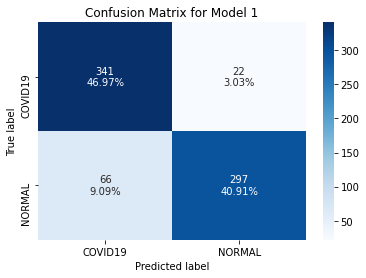

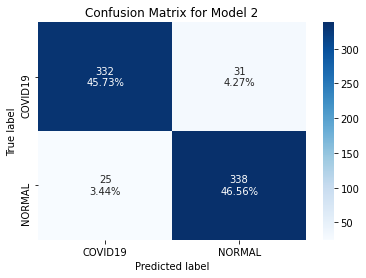

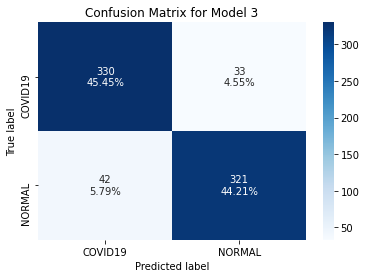

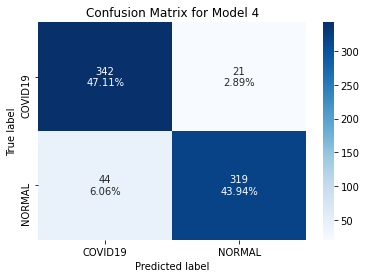

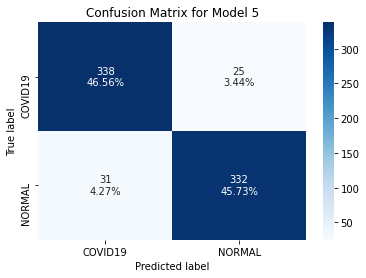

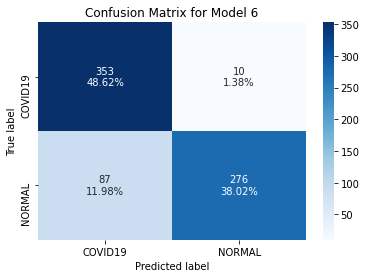

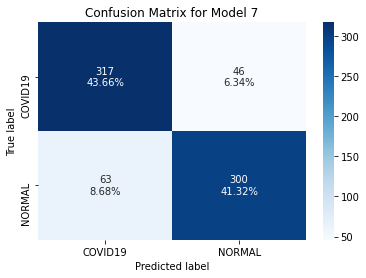

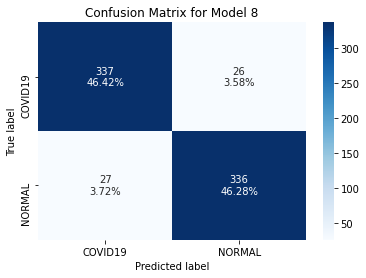

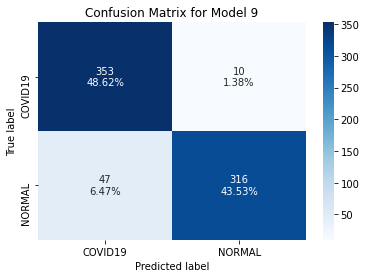

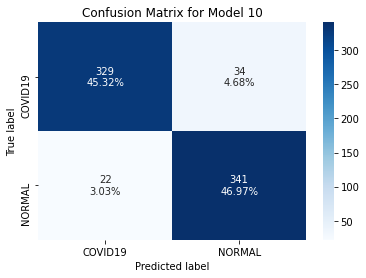

In [ ]:
# Setup StratifiedKFold Cross Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accPerFold = []
lossPerFold = []
# K-fold Cross Validation for Model Training
foldNo = 1
# Initialize Label Encoder to encode Target Labels 
le = LabelEncoder()
for train, test in kfold.split(XTrain, YTrain):
  # Data Augmentation
  covidCount = 0
  normCount = 0

  augmentedDataX = []
  augmentedDataY = []
  
  numAugmented = 0
  # Augmentation Parameters taken from: https://towardsdatascience.com/data-augmentation-in-medical-images-95c774e6eaae
  trainDatagen = ImageDataGenerator(rotation_range = 5, shear_range = 0.02, zoom_range = 0.02, samplewise_center=True, samplewise_std_normalization= True)

  # Use Data Augmentation to generate 2000 Images per class
  for XBatch, YBatch in trainDatagen.flow(XTrain[train], YTrain[train], batch_size=1, shuffle=False):
    if (YBatch == 'COVID19'):
      if (covidCount == 2000):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        covidCount += 1
    else:
      if (normCount == 2000):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        normCount += 1
    numAugmented += 1
    if numAugmented == 4000:
      print("\n\nAugmentation Complete!")
      break

  # Concatenate Augmented Data
  augmentedDataX = np.concatenate(augmentedDataX)
  augmentedDataY = np.concatenate(augmentedDataY)
  augmentedDataX = np.concatenate((augmentedDataX, XTrain[train]), axis=0)
  augmentedDataY = np.concatenate((augmentedDataY, YTrain[train]), axis=0)
  
  # Encode Target Labels
  YCatAug = tf.keras.utils.to_categorical(le.fit_transform(augmentedDataY))
  YCatVal = tf.keras.utils.to_categorical(le.fit_transform(YTrain[test]))
  # Begin Training
  with strategy.scope():
    pretrainedUNetPlus = kerasModels.unet_plus_2d((imageSize, imageSize, 3), filter_num=[64, 128, 256, 512, 1024], n_labels=2, 
                           stack_num_down=2, stack_num_up=2, activation='ReLU', 
                            output_activation='Sigmoid', 
                           batch_norm=True, pool=False, unpool=False, 
                           backbone='ResNet50V2', weights='imagenet', 
                           freeze_backbone=True, freeze_batch_norm=True, 
                           name='unetplus')  
    x1 = pretrainedUNetPlus.output
    x1 = tf.keras.layers.GlobalAveragePooling2D()(x1)
    x1 = tf.keras.layers.Dense(1024, activation='relu')(x1)
    x1 = tf.keras.layers.Dense(1024, activation='relu')(x1)
    x1 = tf.keras.layers.Dense(512, activation='relu')(x1)
    predictions = tf.keras.layers.Dense(2, activation='sigmoid')(x1)
  
    # Set only the last layer to be trainable
    for layer in pretrainedUNetPlus.layers[:43]:
      layer.trainable = False
  
    for layer in pretrainedUNetPlus.layers[43:]:
      layer.trainable = True 
  
    # Compile the Model
    modelUNetPlus = Model(inputs = pretrainedUNetPlus.input, outputs = predictions)
    modelUNetPlus.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {foldNo} ...')

  # Fit data to model and save the best model to Google Drive
  mcpSaveUNetPlus = ModelCheckpoint('drive/MyDrive/DissertationDataset/Models/UNetPlus/UNetPlus' + str(foldNo) + '.h5', save_best_only=True, monitor='val_loss', mode='min')
  UNetPluslrReduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.0001, patience=16, verbose=1)
  UNetPlusESCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=140, verbose=1)
  historyUNetPlus = modelUNetPlus.fit(augmentedDataX, YCatAug, validation_data = (XTrain[test], YCatVal), callbacks=[UNetPlusESCallback, UNetPluslrReduce, mcpSaveUNetPlus], epochs=300, batch_size=1024)

  # Generate generalization metrics
  scores = modelUNetPlus.evaluate(XTrain[test], YCatVal, verbose=0)
  print(f'Score for fold {foldNo}: {modelUNetPlus.metrics_names[0]} of {scores[0]}; {modelUNetPlus.metrics_names[1]} of {scores[1]*100}%')
  accPerFold.append(scores[1] * 100)
  lossPerFold.append(scores[0])

  # Increase fold number
  foldNo = foldNo + 1

  # Print out Fold Results, Classification Report, and Confusion Matrix
  predict = modelUNetPlus.predict(XTrain[test])
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  for j in YCatVal:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(foldNo - 1))

In [ ]:
# Average 10-Fold Cross Validation Accuracy
np.mean(accPerFold)

90.19283890724182

In [ ]:
# Average 10-Fold Cross Validation Loss
np.mean(lossPerFold)

0.24442136734724046

Model 1:

              precision    recall  f1-score   support

     COVID19       0.92      0.86      0.89       363
      NORMAL       0.87      0.92      0.89       363

    accuracy                           0.89       726
   macro avg       0.89      0.89      0.89       726
weighted avg       0.89      0.89      0.89       726

Model 2:

              precision    recall  f1-score   support

     COVID19       0.96      0.82      0.89       363
      NORMAL       0.85      0.97      0.90       363

    accuracy                           0.90       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.90      0.90       726

Model 3:

              precision    recall  f1-score   support

     COVID19       0.95      0.79      0.86       363
      NORMAL       0.82      0.96      0.88       363

    accuracy                           0.87       726
   macro avg       0.88      0.87      0.87       726
weighted avg       0.88      0.87      0.87 

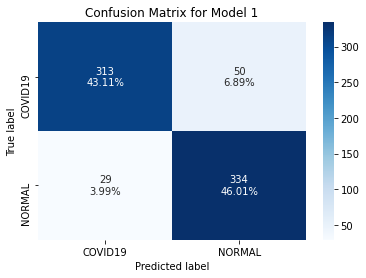

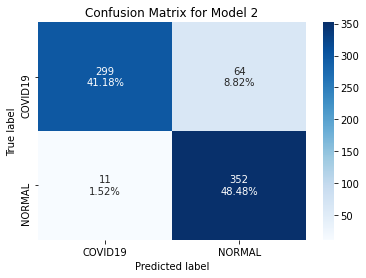

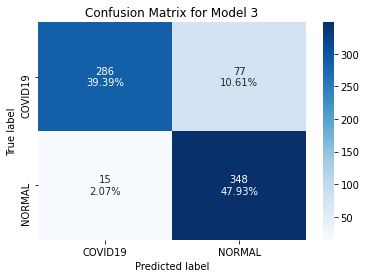

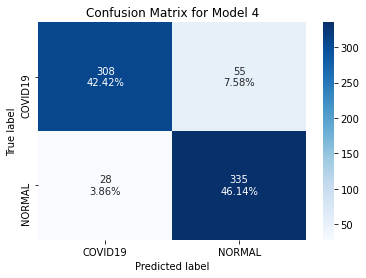

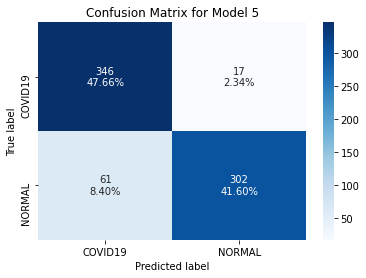

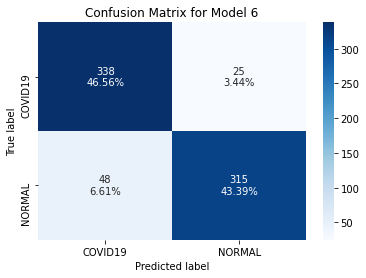

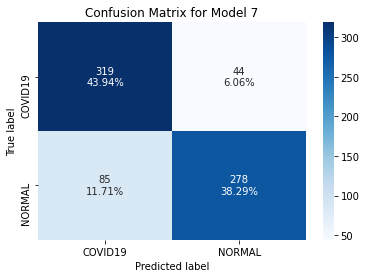

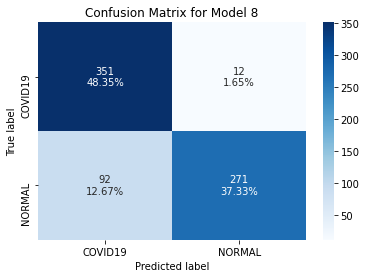

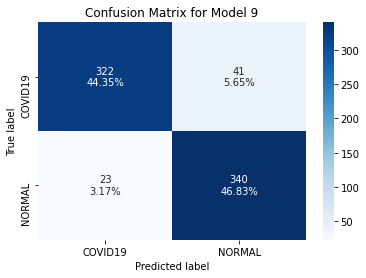

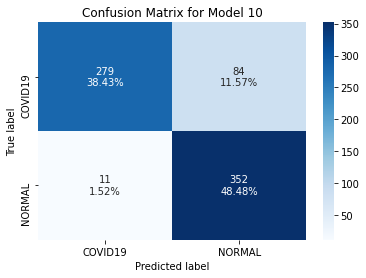

In [ ]:
# Model Evaluation on Unseen Data
for i in range(1, 11):
  reconstructedUNetPlus = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/UNetPlus/UNetPlus'+str(i)+'.h5')
  predict = reconstructedUNetPlus.predict(XTest)
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  print('Model ' + str(i) + ':\n')
  YCatTest = tf.keras.utils.to_categorical(le.fit_transform(YTest))
  for j in YCatTest:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(i))

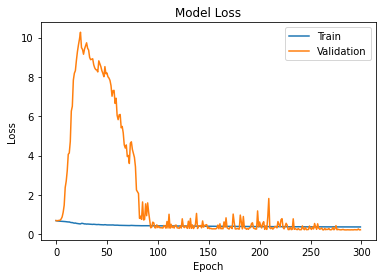

In [ ]:
# Plot Trends in Loss
display_training_curves(historyUNetPlus.history['loss'], historyUNetPlus.history['val_loss'], 'loss')

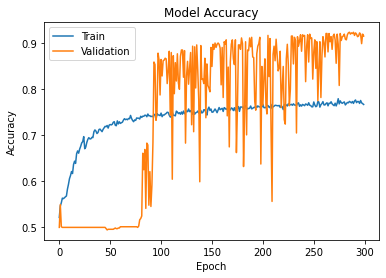

In [ ]:
# Plot Trends in Accuracy
display_training_curves(historyUNetPlus.history['accuracy'], historyUNetPlus.history['val_accuracy'], 'accuracy')

### __Ensembling U-Net, Attention U-Net and U-Net++__

_Utilizes Ensemble Learning to concatenate the final probabilities from each individual model._



Augmentation Complete!
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
11/11 [==============================] - 94s 5s/step - loss: 0.6905 - accuracy: 0.6595 - val_loss: 0.6765 - val_accuracy: 0.9848
Epoch 2/50
11/11 [==============================] - 6s 543ms/step - loss: 0.6800 - accuracy: 0.7890 - val_loss: 0.6608 - val_accuracy: 0.9725
Epoch 3/50
11/11 [==============================] - 6s 541ms/step - loss: 0.6693 - accuracy: 0.7994 - val_loss: 0.6451 - val_accuracy: 0.9835
Epoch 4/50
11/11 [==============================] - 6s 544ms/step - loss: 0.6595 - accuracy: 0.7965 - val_loss: 0.6303 - val_accuracy: 0.9766
Epoch 5/50
11/11 [==============================] - 6s 542ms/step - loss: 0.6498 - accuracy: 0.7971 - val_loss: 0.6159 - val_accuracy: 0.9780
Epoch 6/50
11/11 [==============================] - 6s 544ms/step - loss: 0.6403 - accuracy: 0.8009 - val_loss: 0.6018 - val_accuracy: 0.9793
Epoch 7/50
11/11 [==========

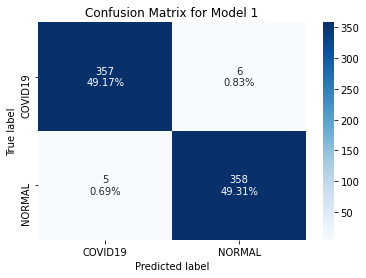

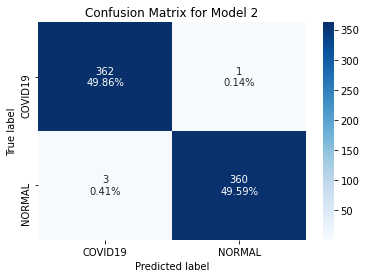

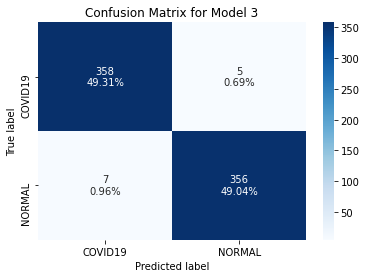

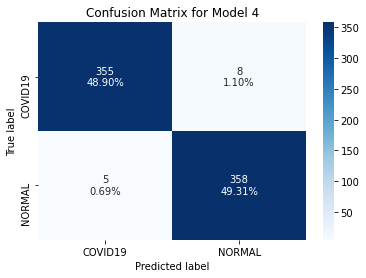

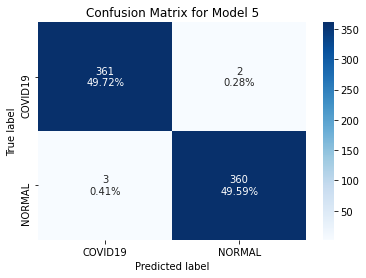

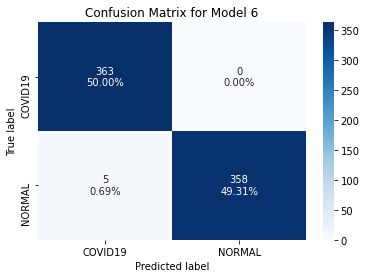

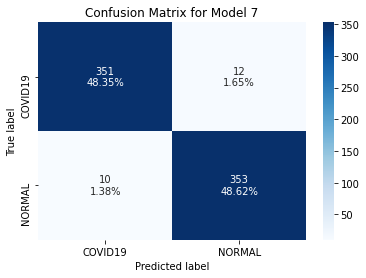

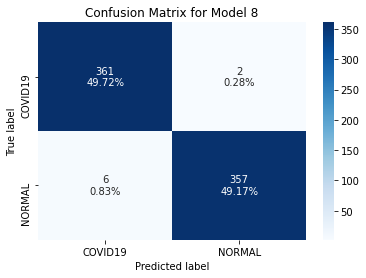

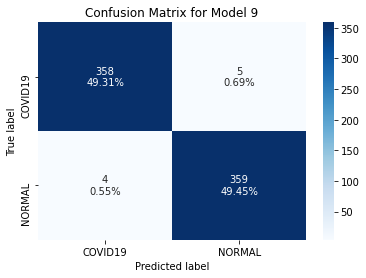

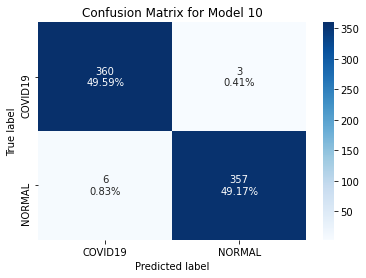

In [ ]:
# Setup StratifiedKFold Cross Validation
kfold = StratifiedKFold(n_splits=10)
accPerFold = []
lossPerFold = []
# K-fold Cross Validation for Model Training
foldNo = 1
# Initialize Label Encoder to encode Target Labels 
le = LabelEncoder()

# Combine the best performing models
with strategy.scope():
  # Load Trained Models
  reconstructedUNet = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/UNet/UNet8.h5')
  reconstructedAttUNet = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/AttUNet/AttUNet2.h5')
  reconstructedUNetPlus = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/UNetPlus/UNetPlus9.h5')
            
for train, test in kfold.split(XTrain, YTrain):
   # Data Augmentation
  covidCount = 0
  normCount = 0

  augmentedDataX = []
  augmentedDataY = []
  
  numAugmented = 0
  # Augmentation Parameters taken from: https://towardsdatascience.com/data-augmentation-in-medical-images-95c774e6eaae
  trainDatagen = ImageDataGenerator(rotation_range = 5, shear_range = 0.02, zoom_range = 0.02, samplewise_center=True, samplewise_std_normalization= True)

  # Use Data Augmentation to generate 2000 Images per class
  for XBatch, YBatch in trainDatagen.flow(XTrain[train], YTrain[train], batch_size=1, shuffle=False):
    if (YBatch == 'COVID19'):
      if (covidCount == 2000):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        covidCount += 1
    else:
      if (normCount == 2000):
        continue
      else:
        augmentedDataX.append(XBatch)
        augmentedDataY.append(YBatch)
        normCount += 1
    numAugmented += 1
    if numAugmented == 4000:
      print("\n\nAugmentation Complete!")
      break

  # Concatenate Augmented Data
  augmentedDataX = np.concatenate(augmentedDataX)
  augmentedDataY = np.concatenate(augmentedDataY)
  augmentedDataX = np.concatenate((augmentedDataX, XTrain[train]), axis=0)
  augmentedDataY = np.concatenate((augmentedDataY, YTrain[train]), axis=0)
  
  # Encode Target Labels
  YCatAug = tf.keras.utils.to_categorical(le.fit_transform(augmentedDataY))
  YCatVal = tf.keras.utils.to_categorical(le.fit_transform(YTrain[test]))

  with strategy.scope():
    modelUNet = Model(inputs = reconstructedUNet.input, outputs = reconstructedUNet.get_layer("dense_88").output)
    modelAttUNet = Model(inputs = reconstructedAttUNet.input, outputs = reconstructedAttUNet.get_layer("dense_4").output)
    modelUNetPlus = Model(inputs = reconstructedUNetPlus.input, outputs = reconstructedUNetPlus.get_layer("dense_72").output)
     
    # Do not re-train the layers
    for layer in modelUNet.layers:
      layer.trainable = False
    for layer in modelAttUNet.layers:
      layer.trainable = False
    for layer in modelUNetPlus.layers:
      layer.trainable = False

    visible = tf.keras.layers.Input(shape=(imageSize, imageSize, 3), name="input")
    x1 = modelUNet(visible)
    x2 = modelAttUNet(visible)
    x3 = modelUNetPlus(visible)

    # Merging the Models
    merge = tf.keras.layers.concatenate([x1, x2, x3], name="concatenate")
    ensembleModel = tf.keras.layers.Dense(2, activation='softmax', name="predictions")(merge)

    # Compile the Model
    ensembleModel = Model(inputs = visible, outputs = ensembleModel)
    ensembleModel.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {foldNo} ...')

  # Fit data to model and save the best model to Google Drive
  ensembleModelSave = ModelCheckpoint('drive/MyDrive/DissertationDataset/Models/EnsembleCT/EnsembleCT' + str(foldNo) + '.h5', save_best_only=True, monitor='val_loss', mode='min')
  historyEnsemble = ensembleModel.fit(augmentedDataX, YCatAug, validation_data = (XTrain[test], YCatVal), callbacks=[lrReduce, esCallback, ensembleModelSave], epochs=50, batch_size=1024)

  
  # Generate generalization metrics
  scores = ensembleModel.evaluate(XTrain[test], YCatVal, verbose=0)
  print(f'Score for fold {foldNo}: {ensembleModel.metrics_names[0]} of {scores[0]}; {ensembleModel.metrics_names[1]} of {scores[1]*100}%')
  accPerFold.append(scores[1] * 100)
  lossPerFold.append(scores[0])

  # Increase fold number
  foldNo = foldNo + 1

  # Print out Fold Results, Classification Report, and Confusion Matrix
  predict = ensembleModel.predict(XTrain[test])
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  for j in YCatVal:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(foldNo - 1))

In [ ]:
# Average 10-Fold Cross Validation Accuracy
np.mean(accPerFold)

98.6501395702362

In [ ]:
# Average 10-Fold Cross Validation Loss
np.mean(lossPerFold)

0.2830904483795166

Model 1:

              precision    recall  f1-score   support

     COVID19       0.98      0.98      0.98       363
      NORMAL       0.98      0.98      0.98       363

    accuracy                           0.98       726
   macro avg       0.98      0.98      0.98       726
weighted avg       0.98      0.98      0.98       726

Model 2:

              precision    recall  f1-score   support

     COVID19       0.98      0.98      0.98       363
      NORMAL       0.98      0.98      0.98       363

    accuracy                           0.98       726
   macro avg       0.98      0.98      0.98       726
weighted avg       0.98      0.98      0.98       726

Model 3:

              precision    recall  f1-score   support

     COVID19       0.98      0.98      0.98       363
      NORMAL       0.98      0.98      0.98       363

    accuracy                           0.98       726
   macro avg       0.98      0.98      0.98       726
weighted avg       0.98      0.98      0.98 

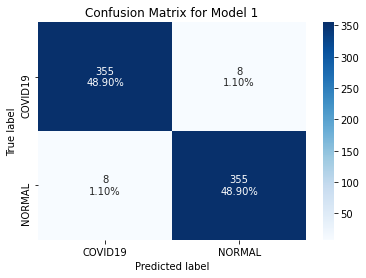

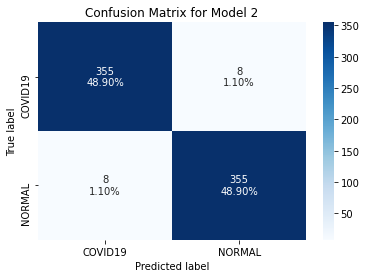

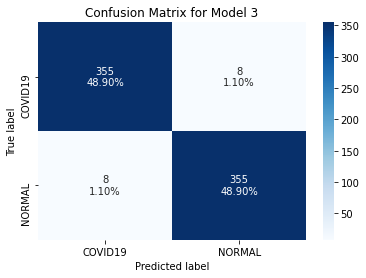

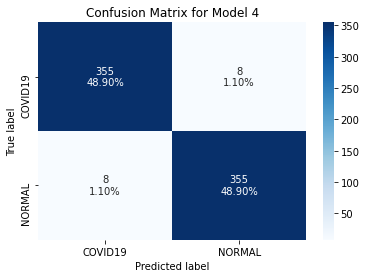

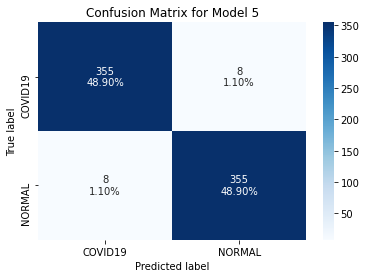

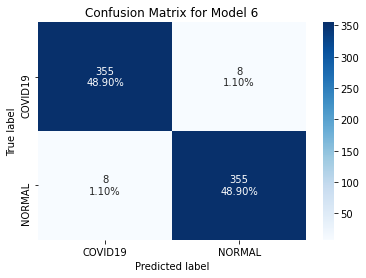

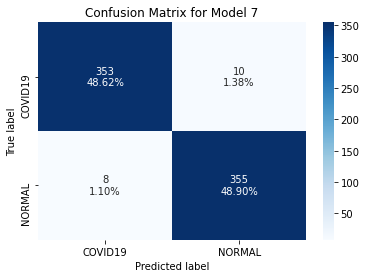

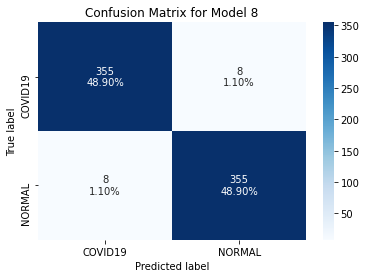

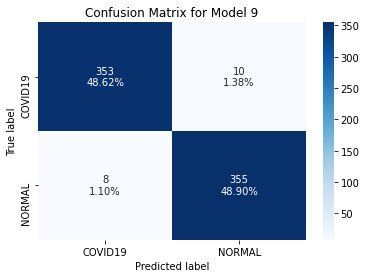

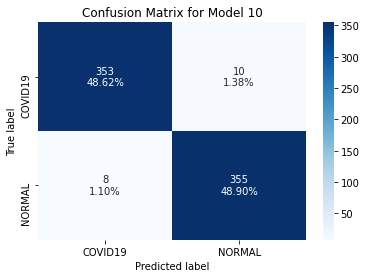

In [ ]:
# Model Evaluation on Unseen Data
for i in range(1, 11):
  reconstructedEnsembleCT = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/EnsembleCT/EnsembleCT' + str(i) + '.h5')
  predict = reconstructedEnsembleCT.predict(XTest)
  predictAsLabels = []
  actualLabels = []
  for j in predict:
    predictAsLabels.append(np.argmax(j))
  print('Model ' + str(i) + ':\n')
  YCatTest = tf.keras.utils.to_categorical(le.fit_transform(YTest))
  for j in YCatTest:
    actualLabels.append(np.argmax(j))
  print(classification_report(actualLabels, predictAsLabels, target_names=list(le.classes_)))
  cm = confusion_matrix(actualLabels, predictAsLabels)
  make_confusion_matrix(cm, categories=list(le.classes_), title='Confusion Matrix for Model ' + str(i))

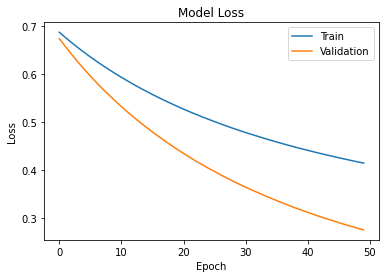

In [ ]:
# Plot Trends in Loss
display_training_curves(historyEnsemble.history['loss'], historyEnsemble.history['val_loss'], 'loss')

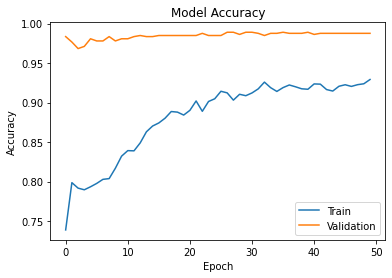

In [ ]:
# Plot Trends in Accuracy
display_training_curves(historyEnsemble.history['accuracy'], historyEnsemble.history['val_accuracy'], 'accuracy')

### __Heatmap Visualization__

In [ ]:
# Load best performing models
reconstructedUNet = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/UNet/UNet8.h5')
reconstructedAttUNet = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/AttUNet/AttUNet2.h5')
reconstructedUNetPlus = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/UNetPlus/UNetPlus9.h5')


# Initialize Labels and Layer Names
labels = ['COVID-19', 'NORMAL']
models = [reconstructedUNet, reconstructedAttUNet, reconstructedUNetPlus]
lastConvLayerNames = {"UNet": "unet_output", "AttUNet": "attunet_output", "UNetPlus": "unetplus_output"}
classifierLayerNames = { 
    "UNet": [
                  "unet_output_activation",
                  "global_average_pooling2d_37",
                  "dense_88",
                  "dense_89",
                  "dense_90",
                  "dense_91",
    ],
    "AttUNet": [
                  "attunet_output_activation",
                  "global_average_pooling2d_1",
                  "dense_4",
                  "dense_5",
                  "dense_6",
                  "dense_7",
    ],
    "UNetPlus": [
               "unetplus_output_activation",
               "global_average_pooling2d_18",
               "dense_72",
               "dense_73",
               "dense_74",
               "dense_75",
    ],
}

In [ ]:
def makeDecisionXRay(imagePath, outputPath):
  """
    Function retrieves the heatmap and diagnosis result for a given test image 
  """
  testImageFiltered = splitLungParenchyma(imagePath, 15599, -96)
  testImageFiltered = cv2.cvtColor(testImageFiltered, cv2.COLOR_GRAY2RGB)
  testImageFiltered = cv2.resize(testImageFiltered, (128, 128), interpolation=cv2.INTER_NEAREST)
  testImageFiltered = np.expand_dims(testImageFiltered, axis=0)
  testImage = cv2.imread(imagePath)
  testImage = cv2.resize(testImage, (128, 128), interpolation=cv2.INTER_NEAREST)
  plt.imsave(os.path.join(outputPath, 'input.jpg'), testImage)
  testImage = np.expand_dims(testImage, axis=0)
  heatmaps = []
  for i, model in enumerate(models):
    convLayer = lastConvLayerNames[list(lastConvLayerNames.keys())[i]]
    classifierLayerName = classifierLayerNames[list(classifierLayerNames.keys())[i]]
    heatmap, topIndex = make_gradcam_heatmap(testImageFiltered, model, convLayer, classifierLayerName)
    sImg = superimposed_img(testImage[0], heatmap, 128)
    heatmaps.append(sImg)
  
  # Create a numpy array of floats to store the average (assume RGB images)
  finalHeatmap = np.zeros((128, 128,3), np.float)
  for im in heatmaps:
    imageArray = np.array(im, dtype = np.float)
    # N = 3, because of 3 separate images to be combined
    finalHeatmap = finalHeatmap + imageArray/3
  
  # Round values in array and cast as 8-bit integer
  finalHeatmap = np.array(np.round(finalHeatmap), dtype = np.uint8)
  outputImage = Image.fromarray(finalHeatmap, mode="RGB")
  outputImage.save(os.path.join(outputPath, 'heatmap.jpg'))

  reconstructedEnsembleCT = tf.keras.models.load_model('drive/MyDrive/DissertationDataset/Models/EnsembleCT/EnsembleCT1.h5')
  predictionIndex = np.argmax(reconstructedEnsembleCT.predict(testImageFiltered))

  # Store the result in a map 
  jsonResult = {}
  jsonResult['ImagePath'] = outputPath
  jsonResult['Diagnosis'] = labels[predictionIndex]
  jsonResult['Accuracy'] = '99%'
  with open(os.path.join(outputPath, 'result.json'), 'w') as f:
    json.dump(jsonResult, f)

  return finalHeatmap, labels[predictionIndex]

#### __COVID-19 Scans__

In [ ]:
# Get all images provided Folder Path, and generate results
outputPathCOVID = "drive/MyDrive/DissertationDataset/Sample Results/CT/COVID19/"
covid19Scans = glob.glob("drive/MyDrive/DissertationDataset/Sample Scans/CT/COVID19/*")
results = []
for i, path in enumerate(covid19Scans):
  os.makedirs(outputPathCOVID + str(i + 1), exist_ok=True)
  finalHeatmap, prediction = makeDecisionXRay(covid19Scans[i], os.path.join(outputPathCOVID, str(i + 1)))
  results.append((finalHeatmap, prediction))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


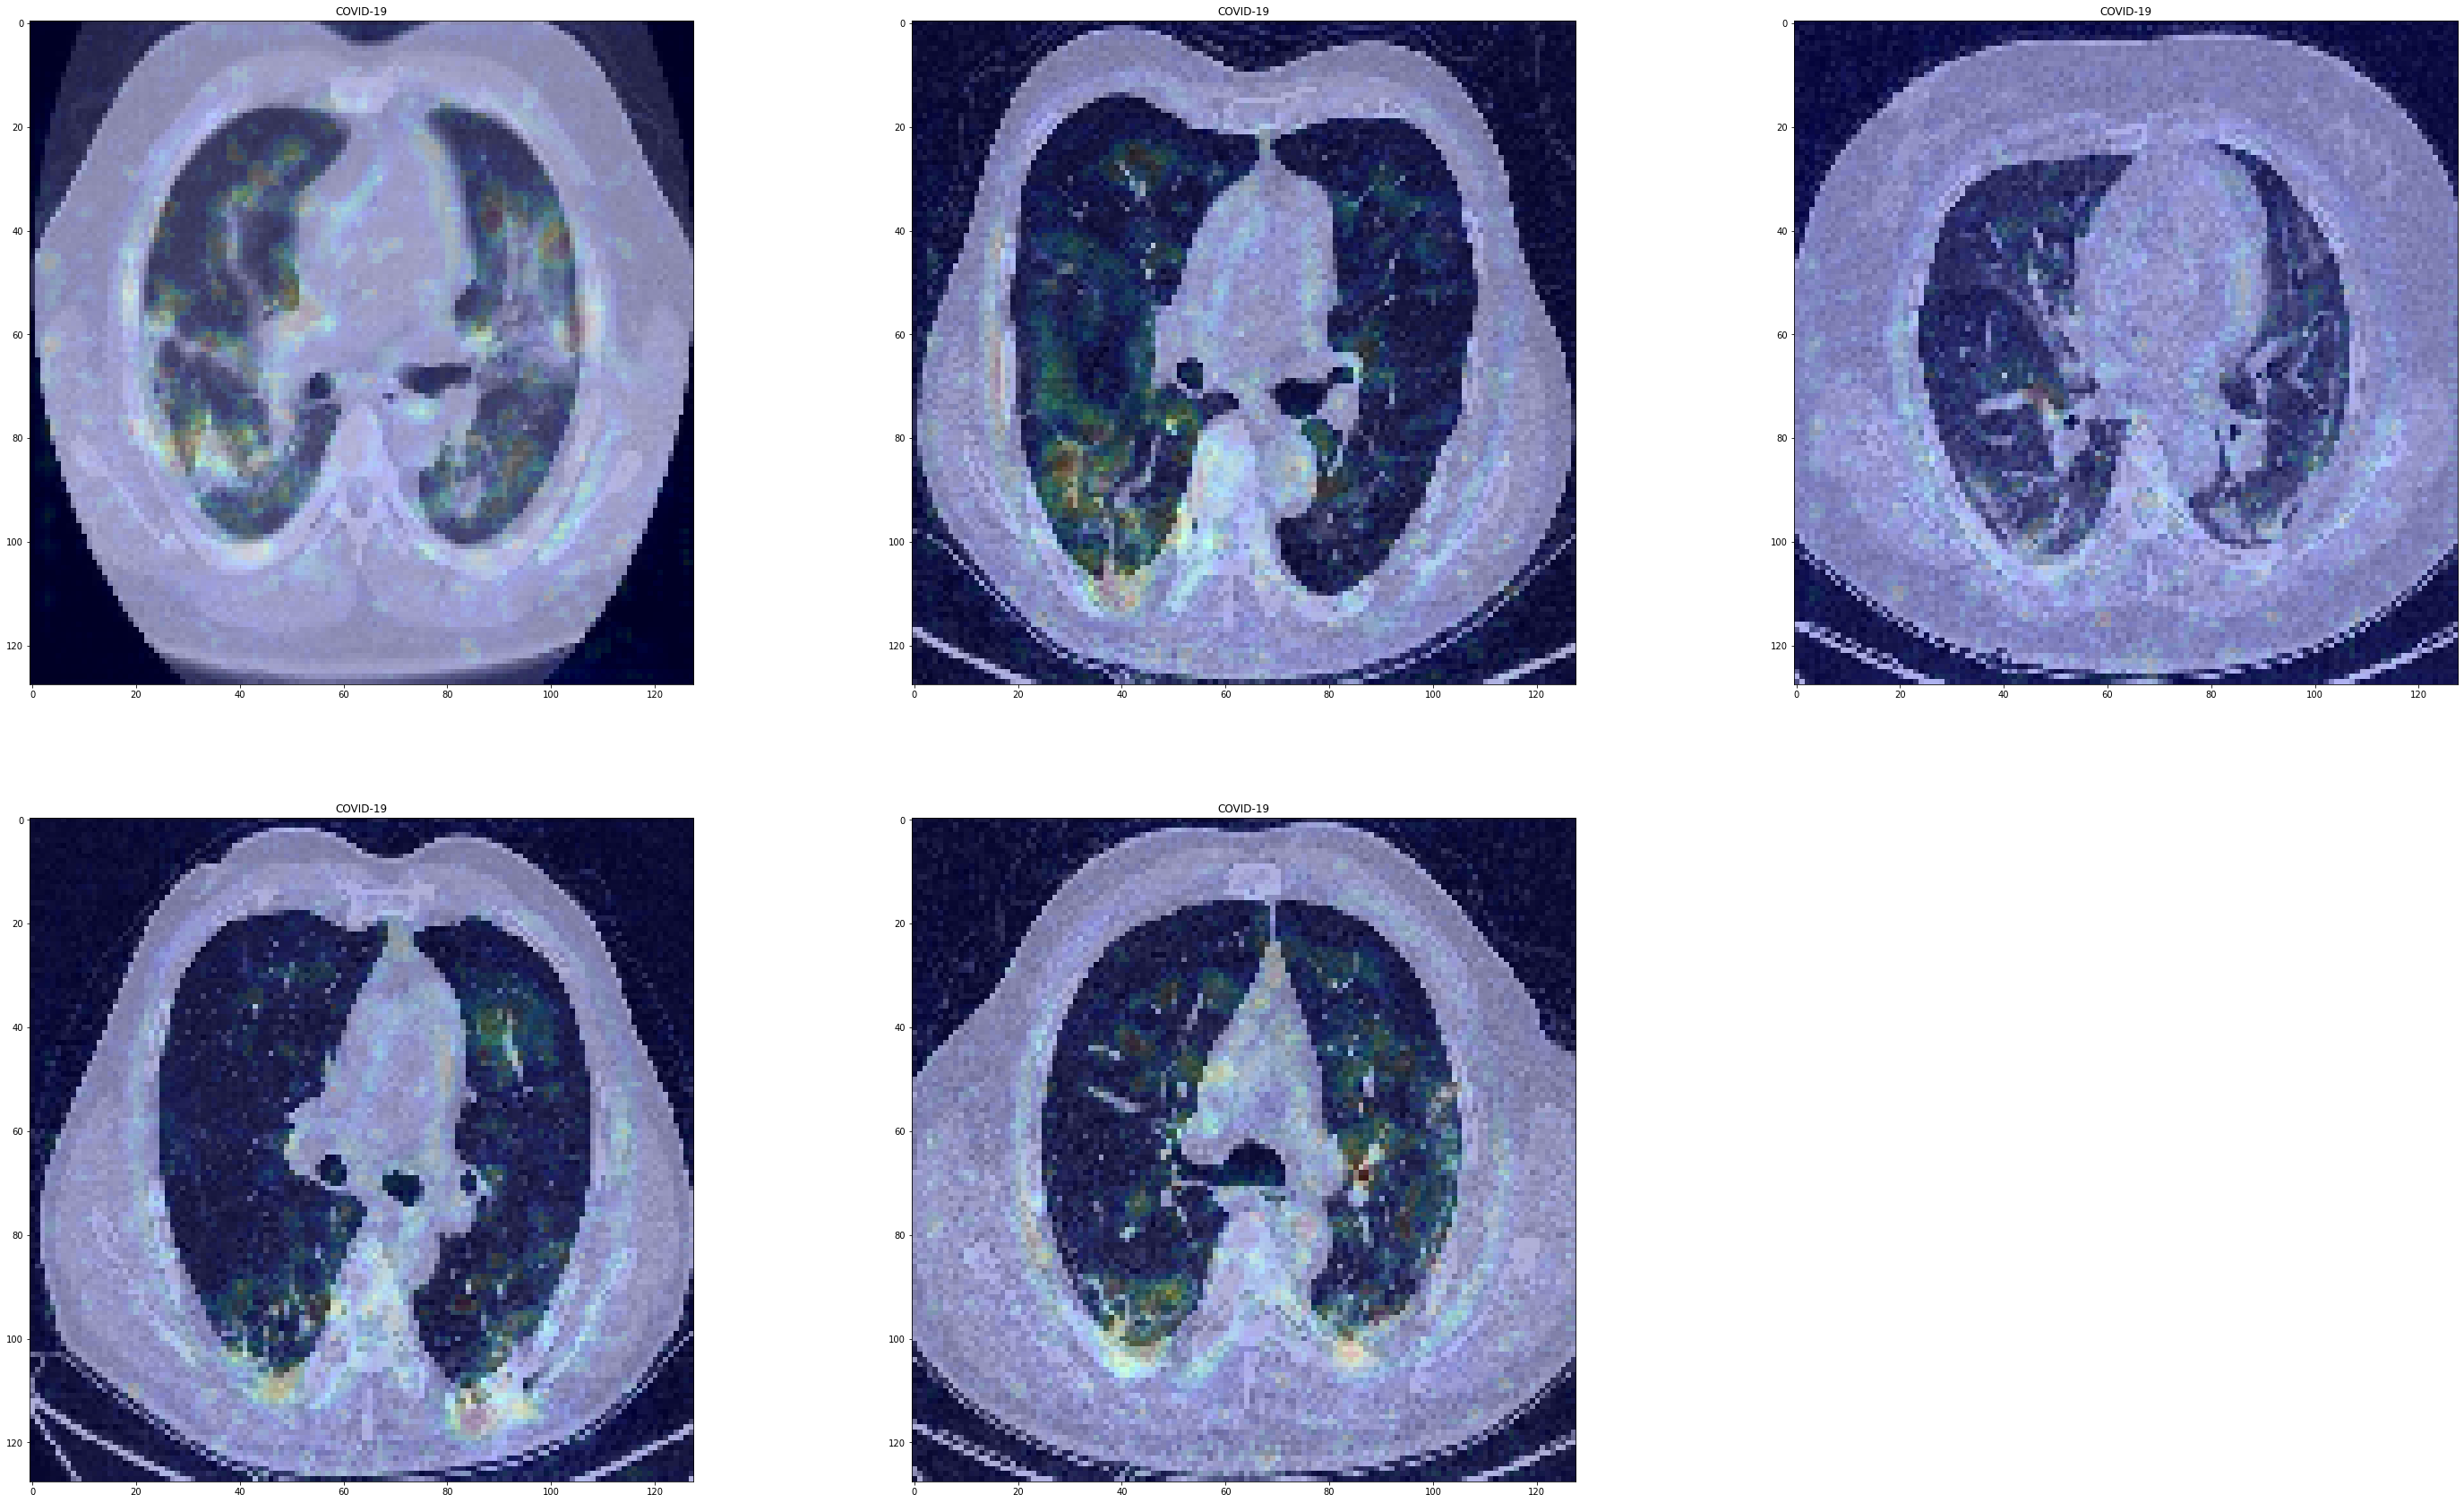

In [ ]:
# Display all the heatmaps generated
fig = plt.figure(figsize=(50,30))
columns = 3
rows = 2
a = np.random.rand(2,3)
for i in range(5):
    fig.add_subplot(2, 3, i + 1)
    plt.imshow(results[i][0])  
    plt.title(results[i][1])
plt.show()